In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (19.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120895 files and direc

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

## 단변량 분석

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/insurance_eda/customer_data_.csv', encoding='cp949')

In [ ]:
# 지표를 쉽게 보기 위함

# AGE컬럼 매핑
age_mapping = {1: '20대', 2:'30대', 3:'40대', 4:'50대', 5:'60대', 6:'70대'}
data['AGE'] = data['AGE'].map(age_mapping)

# 성별컬럼 매핑
gender_mapping = {0: '여성', 1:'남성'}
data['성별'] = data['성별'].map(gender_mapping)

# 갱신컬럼 매핑
renewal_mapping = {0: '비갱신', 1:'갱신'}
data['갱신'] = data['갱신'].map(renewal_mapping)

In [ ]:
print(data['성별'].unique())
print(data['갱신'].unique())

['남성' '여성']
['비갱신' '갱신']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   clust                    12000 non-null  int64  
 1   AGE                      12000 non-null  object 
 2   등록(계/피)                  12000 non-null  object 
 3   고용상태                     12000 non-null  object 
 4   성별                       12000 non-null  object 
 5   Willingness to pay/Stay  12000 non-null  float64
 6   갱신                       12000 non-null  object 
 7   상품타입                     12000 non-null  object 
 8   교육수준                     12000 non-null  object 
 9   소득                       12000 non-null  int64  
 10  지역                       12000 non-null  object 
 11  결혼여부                     12000 non-null  object 
 12  월 납입액                    12000 non-null  int64  
 13  VOC                      12000 non-null  int64  
 14  타 상품 보유 현황            

In [ ]:
# 단변량 분석 함수 정의
def eda(feature_name):
  if data[feature_name].dtype == 'object':
    # 명목형 변수: countplot 출력
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=feature_name)
    plt.xlabel(feature_name)
    plt.ylabel('개수')
    plt.title(f'{feature_name} 분포')
  else:
    # 수치형변수: 히스토그램, box plot
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[feature_name], kde=True)
    plt.xlabel(feature_name)
    plt.ylabel('빈도수')
    plt.title(f'{feature_name} 분포')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[feature_name])
    plt.xlabel(feature_name)
    plt.title(f'{feature_name} 박스플롯')

  plt.tight_layout()
  plt.show()

In [ ]:
variables = list(data.columns)
variables.pop(0)
print(variables)

['AGE', '등록(계/피)', '고용상태', '성별', 'Willingness to pay/Stay', '갱신', '상품타입', '교육수준', '소득', '지역', '결혼여부', '월 납입액', 'VOC', '타 상품 보유 현황', '온라인방문빈도', '갱신인센티브', '판매채널', '총지불금액', '자동차', '거주지사이즈']


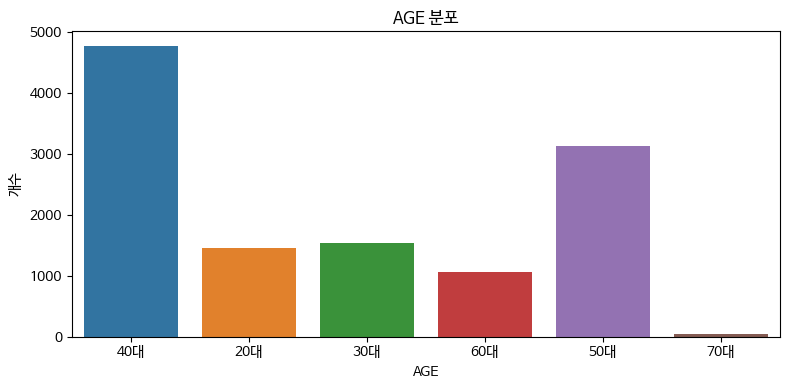

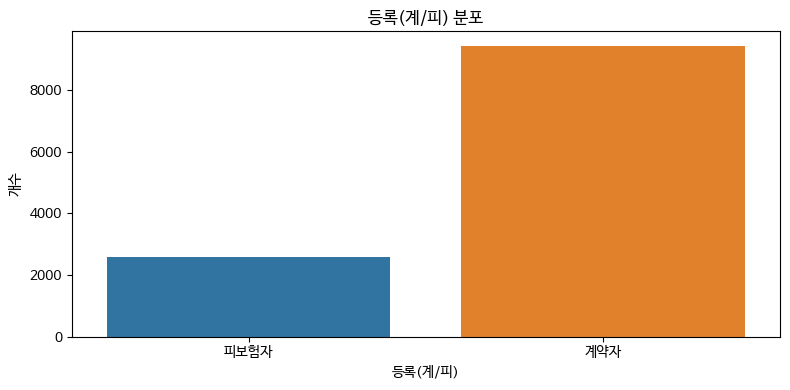

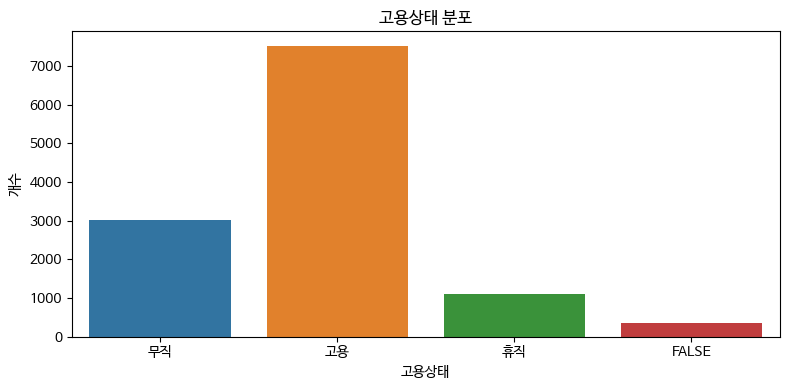

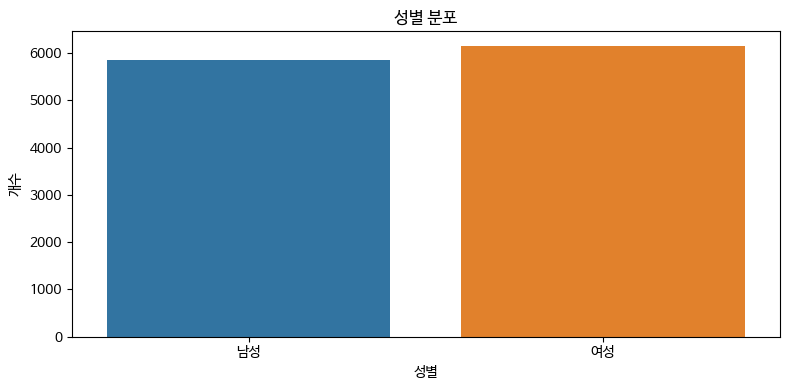

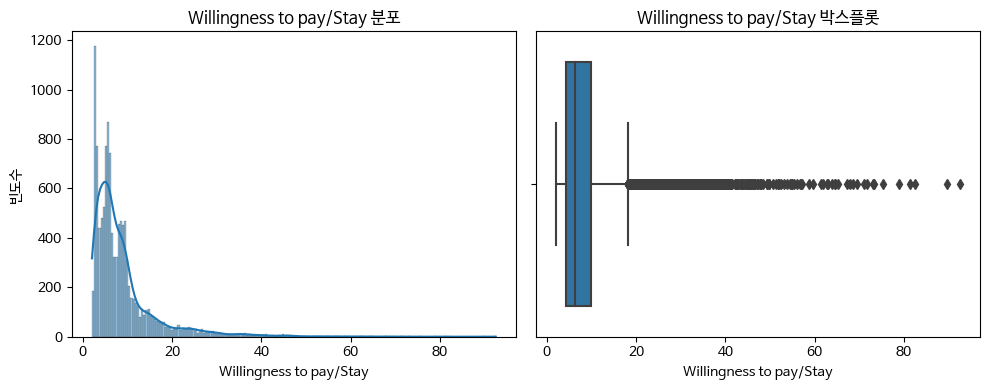

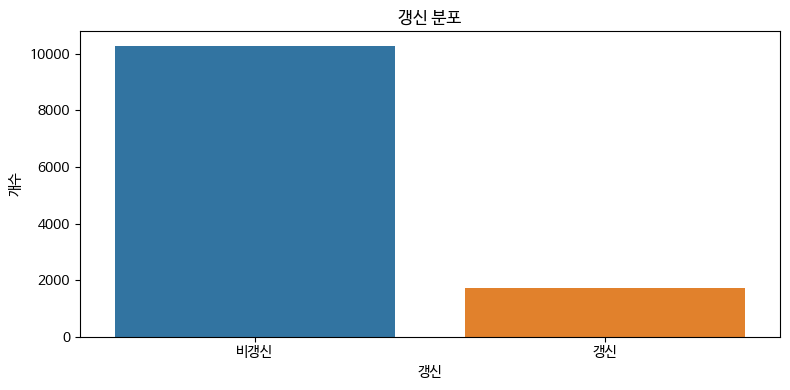

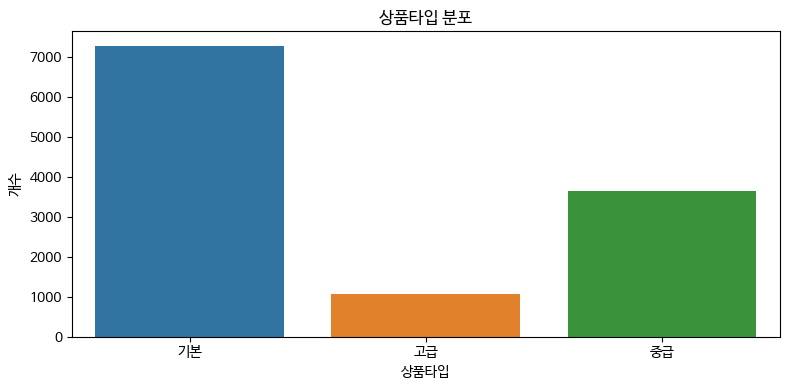

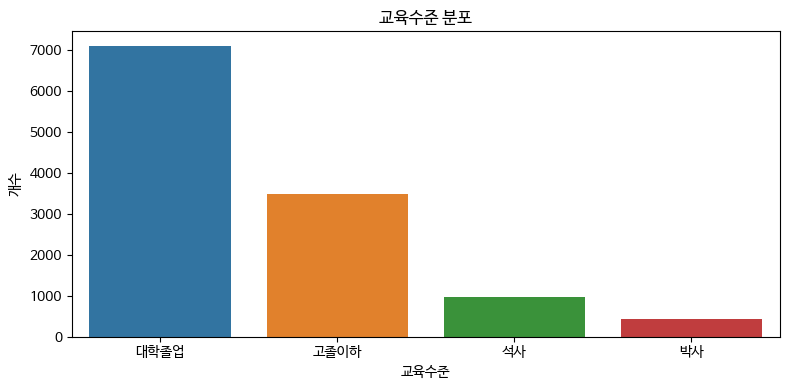

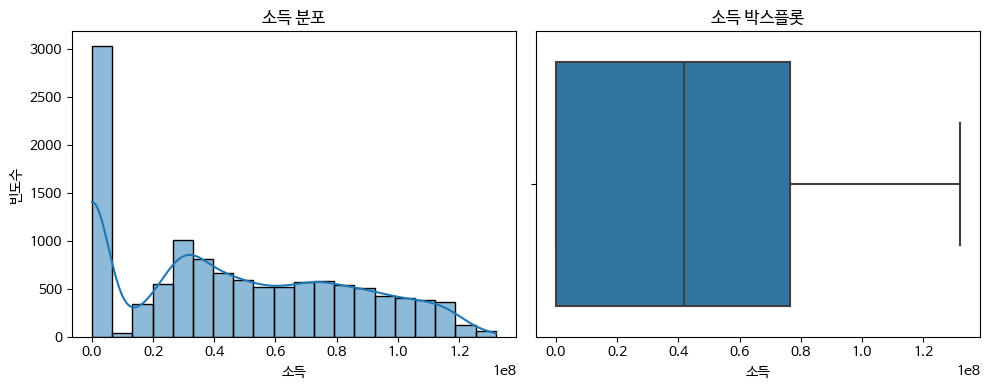

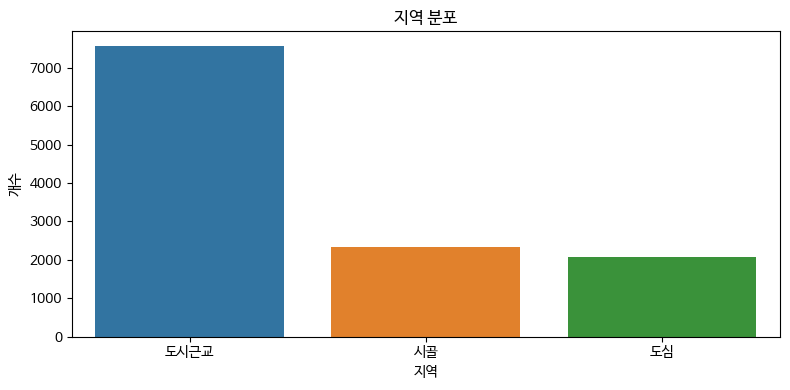

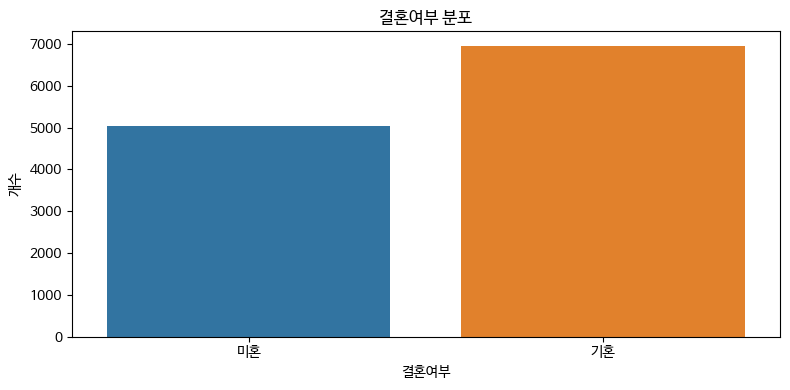

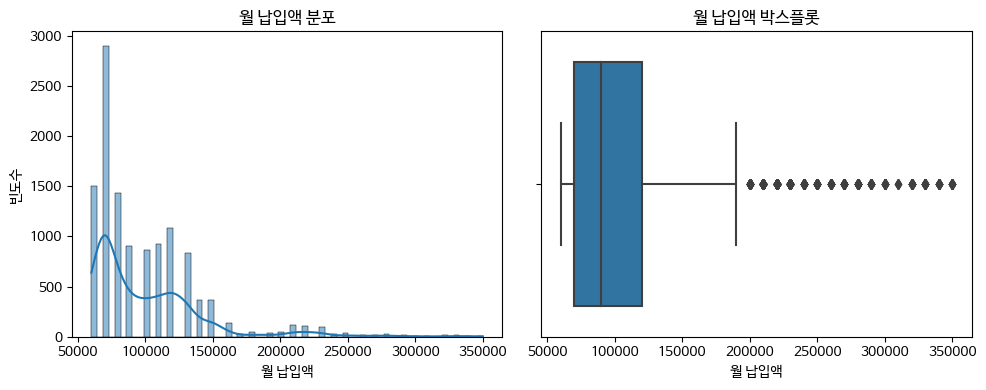

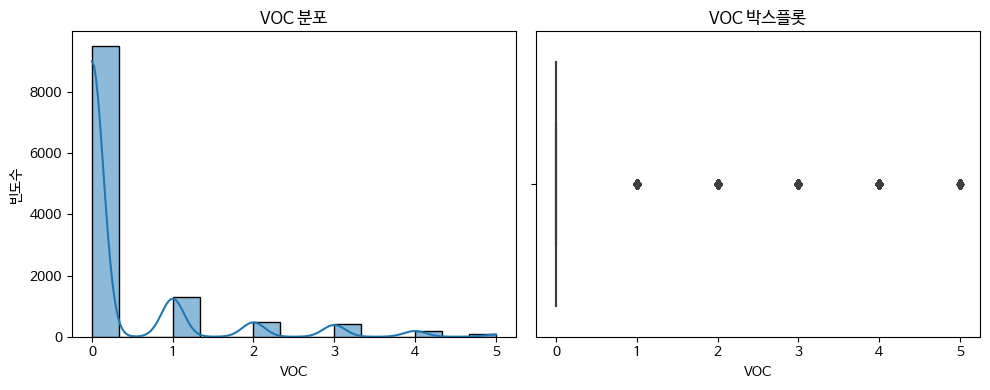

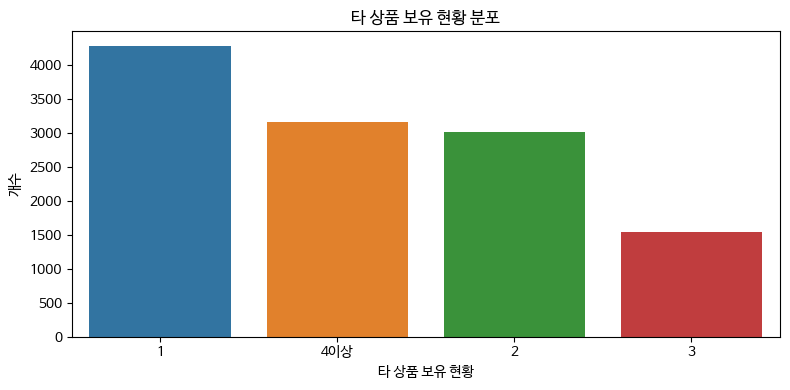

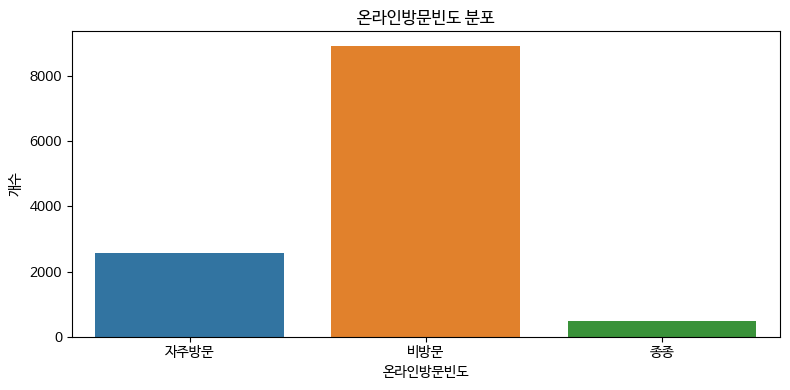

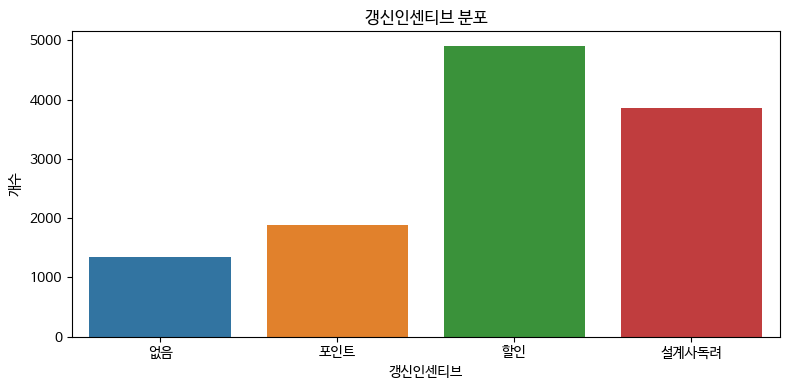

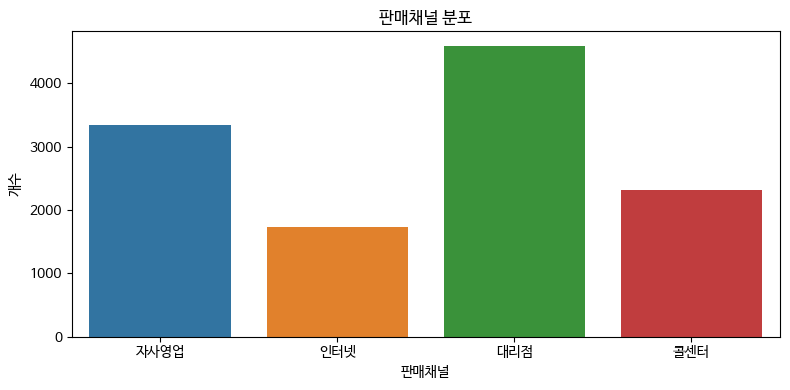

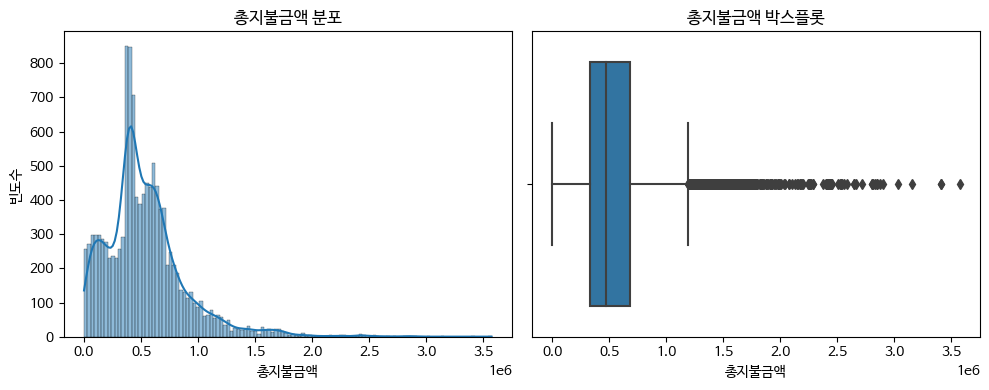

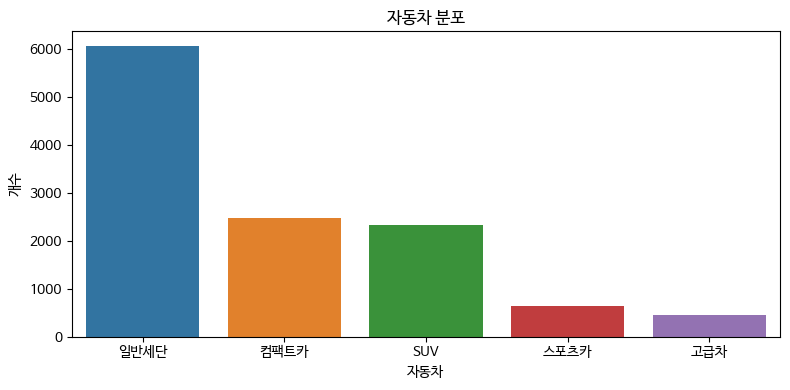

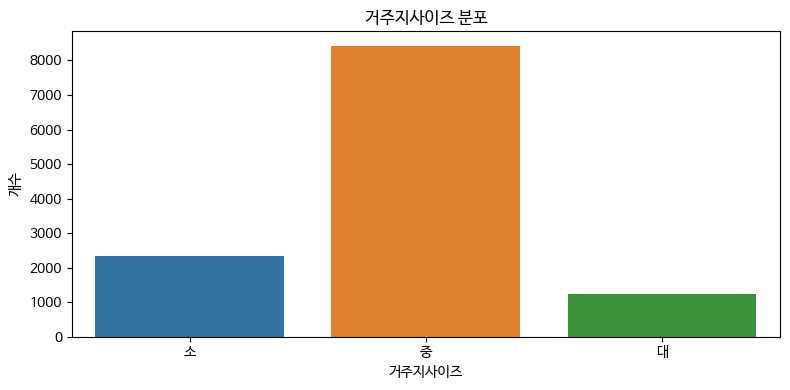

In [ ]:
for variable in variables:
  eda(variable)

Missing Values: 


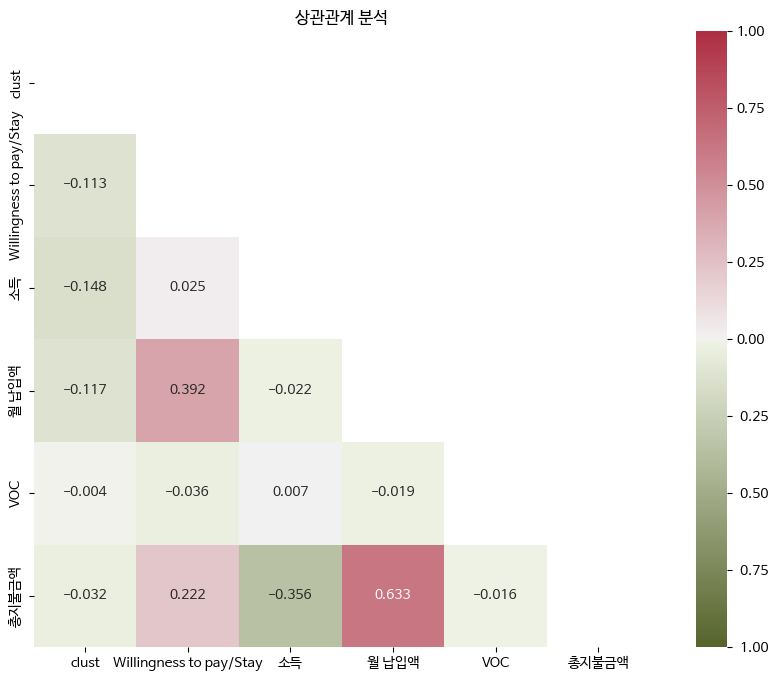

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 결측치 확인
missing_values = data.isnull().sum()
print('Missing Values: ')

# 상관분석 시각화
df = data.corr()
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(df, dtype=bool))
cmap = sns.diverging_palette(100, 7, s=75, l=40, n=5, center="light", as_cmap=True)
sns.heatmap(df,
            annot = True,
            mask = mask,
            fmt = '.3f',
            cmap = cmap,
            vmin = -1, vmax = 1,
            square=True)
plt.title("상관관계 분석")
plt.show()

Willingness to pay/Stay의 이상치 인덱스
[12, 22, 26, 39, 43, 61, 87, 96, 106, 108, 111, 132, 138, 140, 150, 166, 177, 182, 184, 198, 200, 214, 231, 232, 237, 248, 250, 258, 264, 268, 274, 281, 312, 313, 314, 319, 322, 345, 348, 349, 373, 374, 383, 396, 405, 406, 432, 435, 437, 438, 458, 487, 498, 504, 506, 537, 548, 556, 595, 610, 621, 628, 631, 649, 651, 659, 695, 714, 718, 720, 725, 748, 759, 767, 769, 770, 783, 786, 789, 796, 802, 806, 826, 829, 831, 849, 874, 901, 913, 914, 917, 934, 939, 946, 961, 974, 986, 987, 989, 993, 994, 1010, 1015, 1017, 1027, 1030, 1043, 1104, 1108, 1109, 1113, 1152, 1160, 1166, 1179, 1184, 1191, 1200, 1205, 1210, 1215, 1231, 1251, 1253, 1254, 1260, 1269, 1312, 1318, 1321, 1331, 1337, 1345, 1346, 1382, 1389, 1391, 1418, 1447, 1450, 1463, 1466, 1476, 1477, 1485, 1493, 1507, 1526, 1554, 1556, 1562, 1570, 1571, 1581, 1586, 1598, 1607, 1608, 1609, 1634, 1661, 1688, 1695, 1696, 1723, 1736, 1751, 1780, 1795, 1798, 1819, 1832, 1838, 1848, 1860, 1861, 1863, 1874, 1879, 1

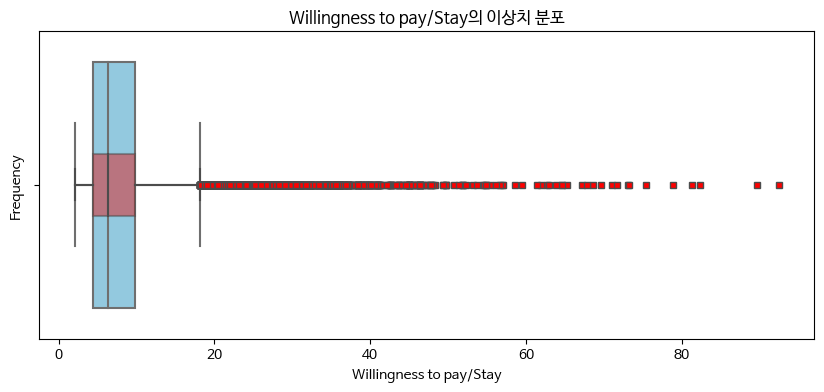

소득의 이상치 인덱스
[]


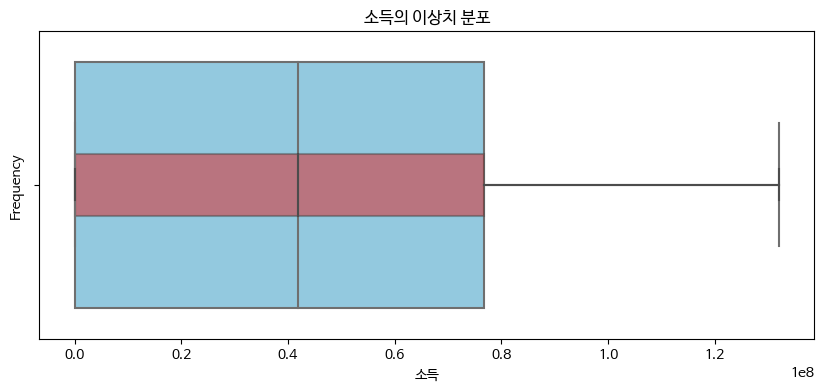

월 납입액의 이상치 인덱스
[20, 45, 64, 76, 94, 96, 135, 150, 197, 205, 217, 218, 266, 281, 348, 374, 378, 383, 435, 439, 450, 473, 487, 506, 542, 556, 595, 603, 621, 647, 653, 661, 663, 701, 718, 725, 731, 763, 770, 775, 788, 829, 835, 862, 886, 908, 936, 986, 1015, 1044, 1045, 1074, 1086, 1157, 1177, 1179, 1184, 1202, 1210, 1235, 1236, 1240, 1251, 1254, 1256, 1264, 1293, 1302, 1409, 1457, 1463, 1492, 1518, 1542, 1556, 1583, 1586, 1601, 1628, 1656, 1695, 1722, 1775, 1780, 1832, 1859, 1874, 1907, 1915, 1924, 1930, 1947, 1957, 1964, 1965, 1973, 1996, 2025, 2053, 2106, 2129, 2138, 2180, 2182, 2221, 2225, 2252, 2285, 2288, 2305, 2343, 2367, 2368, 2382, 2389, 2407, 2432, 2433, 2452, 2457, 2459, 2529, 2582, 2597, 2717, 2725, 2730, 2743, 2758, 2818, 2837, 2862, 2897, 2911, 2945, 2989, 3009, 3047, 3062, 3073, 3114, 3158, 3270, 3275, 3276, 3284, 3291, 3295, 3301, 3362, 3376, 3385, 3388, 3407, 3447, 3475, 3499, 3502, 3621, 3623, 3626, 3641, 3676, 3683, 3698, 3706, 3737, 3754, 3767, 3792, 3810, 3836, 3844, 

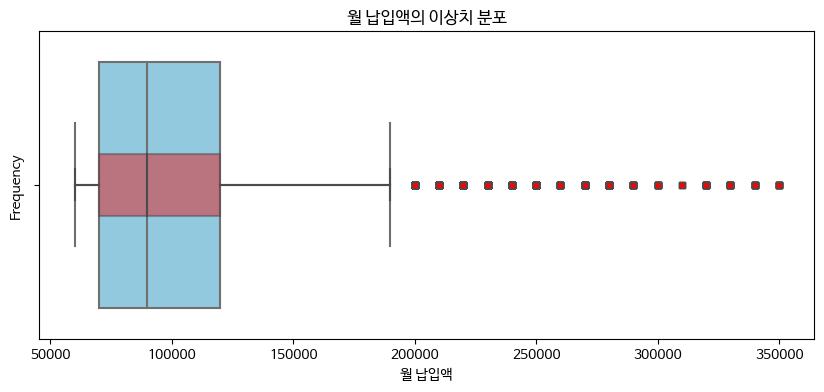

VOC의 이상치 인덱스
[1, 8, 10, 11, 18, 26, 29, 33, 34, 56, 64, 72, 79, 91, 92, 93, 94, 95, 97, 100, 108, 112, 117, 120, 121, 122, 125, 132, 133, 134, 135, 137, 141, 146, 150, 155, 156, 159, 160, 163, 164, 165, 167, 168, 170, 172, 180, 181, 182, 183, 199, 209, 218, 225, 230, 231, 233, 245, 259, 261, 293, 295, 305, 307, 313, 318, 320, 322, 328, 340, 355, 363, 368, 369, 372, 373, 377, 391, 395, 397, 418, 420, 430, 435, 441, 444, 451, 456, 457, 459, 473, 477, 480, 483, 489, 490, 493, 494, 503, 505, 509, 511, 512, 522, 523, 528, 529, 538, 547, 554, 555, 557, 558, 560, 561, 564, 565, 566, 568, 573, 574, 575, 580, 588, 596, 597, 604, 613, 617, 618, 619, 620, 627, 628, 631, 632, 658, 671, 674, 679, 681, 688, 693, 697, 700, 708, 711, 714, 724, 726, 727, 730, 731, 732, 733, 735, 746, 748, 749, 751, 756, 759, 760, 761, 770, 772, 781, 782, 786, 790, 797, 800, 805, 810, 811, 814, 825, 826, 827, 828, 831, 836, 837, 839, 840, 849, 862, 872, 873, 874, 879, 884, 894, 903, 904, 906, 909, 916, 917, 920, 927, 92

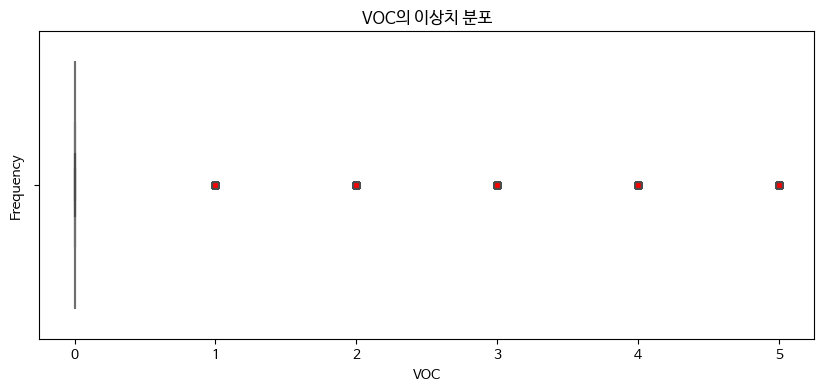

총지불금액의 이상치 인덱스
[3, 26, 30, 59, 65, 75, 76, 79, 135, 138, 197, 217, 218, 220, 228, 252, 266, 276, 281, 348, 367, 374, 376, 378, 392, 410, 440, 487, 510, 532, 551, 595, 603, 625, 647, 653, 661, 701, 704, 710, 715, 718, 724, 727, 731, 751, 752, 770, 775, 776, 800, 806, 835, 862, 873, 886, 908, 936, 945, 1029, 1041, 1064, 1079, 1104, 1132, 1177, 1179, 1184, 1236, 1240, 1241, 1251, 1254, 1256, 1264, 1283, 1288, 1292, 1293, 1317, 1325, 1329, 1390, 1405, 1409, 1457, 1518, 1520, 1586, 1598, 1601, 1619, 1656, 1657, 1669, 1767, 1780, 1815, 1832, 1874, 1907, 1919, 1924, 1947, 1957, 1965, 2053, 2104, 2129, 2138, 2167, 2182, 2221, 2223, 2225, 2252, 2293, 2305, 2330, 2367, 2368, 2383, 2401, 2407, 2436, 2439, 2452, 2457, 2459, 2501, 2582, 2667, 2717, 2722, 2725, 2758, 2776, 2818, 2867, 2939, 3001, 3008, 3047, 3062, 3069, 3071, 3114, 3181, 3223, 3228, 3243, 3284, 3288, 3301, 3351, 3362, 3368, 3376, 3380, 3385, 3388, 3407, 3447, 3472, 3499, 3539, 3579, 3621, 3623, 3650, 3676, 3683, 3698, 3706, 3754, 37

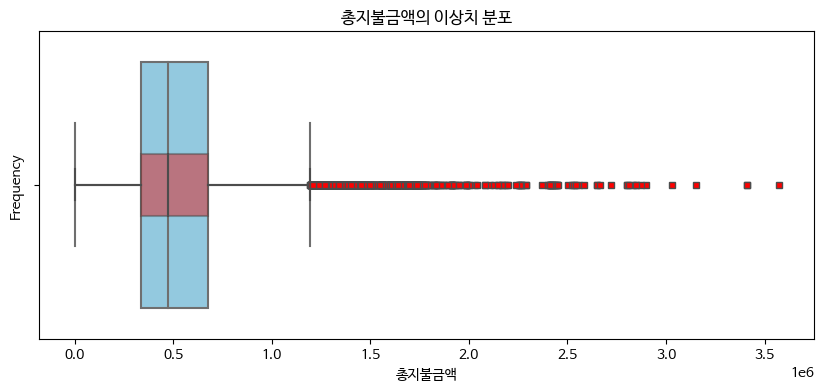

In [ ]:
# 이상치 확인
def detect_outliers(feature_name):
    Q1 = data[feature_name].quantile(0.25)
    Q3 = data[feature_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature_name] < lower_bound) | (data[feature_name] > upper_bound)]
    return outliers

# 이상치 시각화 함수
def plot_outliers(feature_name):
  plt.figure(figsize=(10, 4))

  sns.boxplot(data=data, x=feature_name, color='skyblue', showfliers=False)
  outliers = detect_outliers(variable)
  print(f'{feature_name}의 이상치 인덱스')
  print(list(outliers.index))
  print('===================')
  sns.boxplot(data=data, x=feature_name, color='red', width=0.2, boxprops=dict(alpha=0.5), flierprops=dict(markerfacecolor='red', marker='s'))
  plt.xlabel(feature_name)
  plt.ylabel('Frequency')
  plt.title(f'{feature_name}의 이상치 분포')
  plt.show()



for variable in variables:
  if data[variable].dtype == 'object':
    continue
  else:
    plot_outliers(variable)





## 이변량 분석

### 수치형 변수 - 명목형 변수 관계
- 통계검정: T-test, Anova 분산 분석
- 독립변수: x 범주형
- 종속변수: y 연속형

In [ ]:
import scipy.stats as stats

In [ ]:
numeric_v = []
object_v = []
for i in data:
  if data[i].dtype != 'object':
    numeric_v.append(i)
  else:
    object_v.append(i)

print(numeric_v)
print("========")
print(object_v)

['clust', 'Willingness to pay/Stay', '소득', '월 납입액', 'VOC', '총지불금액']
['AGE', '등록(계/피)', '고용상태', '성별', '갱신', '상품타입', '교육수준', '지역', '결혼여부', '타 상품 보유 현황', '온라인방문빈도', '갱신인센티브', '판매채널', '자동차', '거주지사이즈']


In [ ]:
numeric_v.pop(0)

'clust'

In [ ]:
# 이변량 분석 함수 정의
def bivariate_eda(data, x, y):
  plt.figure(figsize=(10, 6))
  sns.barplot(data=data, x=x, y=y)
  plt.xlabel(x)
  plt.ylabel(y)
  plt.title(f'이변량 분석: {x} vs {y}')
  plt.show()

  if x in numeric_v and len(data[y].unique()) == 2:
    # t검정
    t_stat, p_value = stats.ttest_ind(data[data[y] == data[y].unique()[0]][x],
                                           data[data[y] == data[y].unique()[1]][x])
    print(f'T-test {x} and {y}')
    print(f'T-statistic={t_stat}')
    print(f'P-value={p_value}')
    if p_value <= 0.005:
      print(f"{x}와 {y}와의 상관관계는 유의합니다.")
    else:
      print(f"{x}와 {y}와의 상관관계는 유의하지 않습니다.")
  elif x in numeric_v and len(data[y].unique()) > 2:
    # 카이제곱 검정
    contingency_table = pd.crosstab(data[x], data[y])
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
    print(f'Chi-square Test for Independence between {x} and {y}:')
    print(f'Chi-squared statistic = {chi2}')
    print(f'P-value = {p_value}')
    if p_value <= 0.005:
      print(f"{x}와 {y}와의 상관관계는 유의합니다.")
    else:
      print(f"{x}와 {y}와의 상관관계는 유의하지 않습니다.")
  else:
    print(f'Unsupported combination of variables: {x} and {y}')

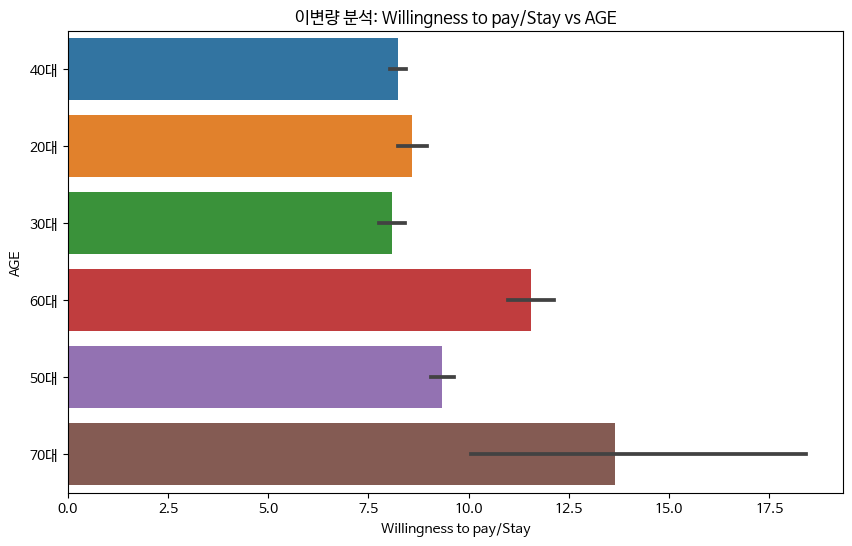

Chi-square Test for Independence between Willingness to pay/Stay and AGE:
Chi-squared statistic = 21591.109872174133
P-value = 1.4653267944835713e-238
Willingness to pay/Stay와 AGE와의 상관관계는 유의합니다.


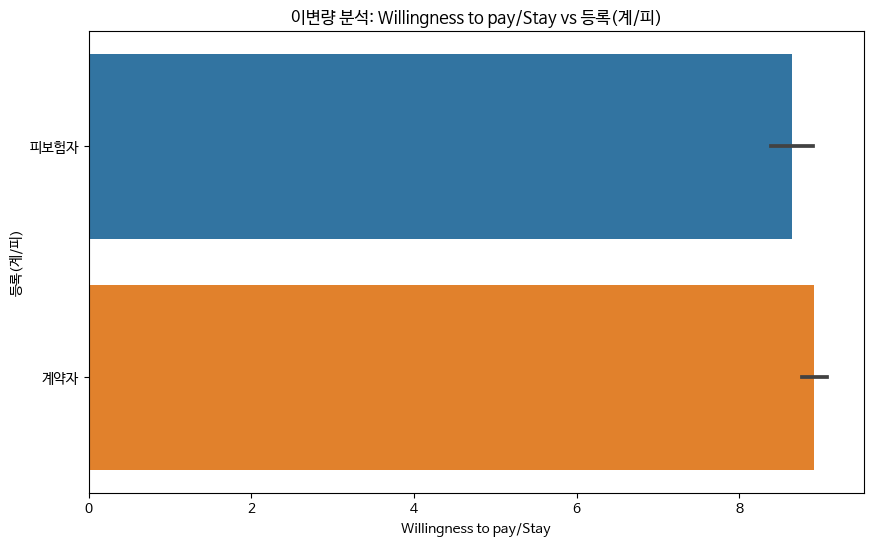

T-test Willingness to pay/Stay and 등록(계/피)
T-statistic=-1.6039297562880306
P-value=0.10875585802757168
Willingness to pay/Stay와 등록(계/피)와의 상관관계는 유의하지 않습니다.


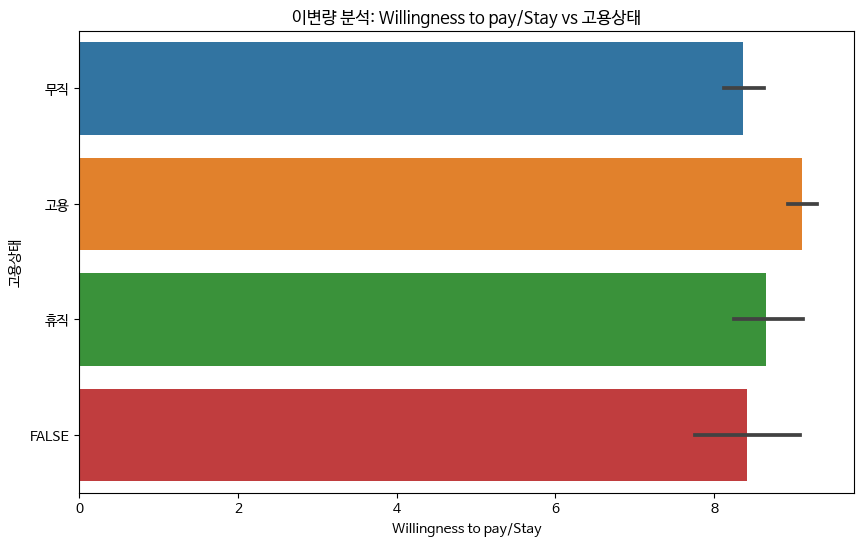

Chi-square Test for Independence between Willingness to pay/Stay and 고용상태:
Chi-squared statistic = 13736.772326717779
P-value = 1.4181575929965987e-198
Willingness to pay/Stay와 고용상태와의 상관관계는 유의합니다.


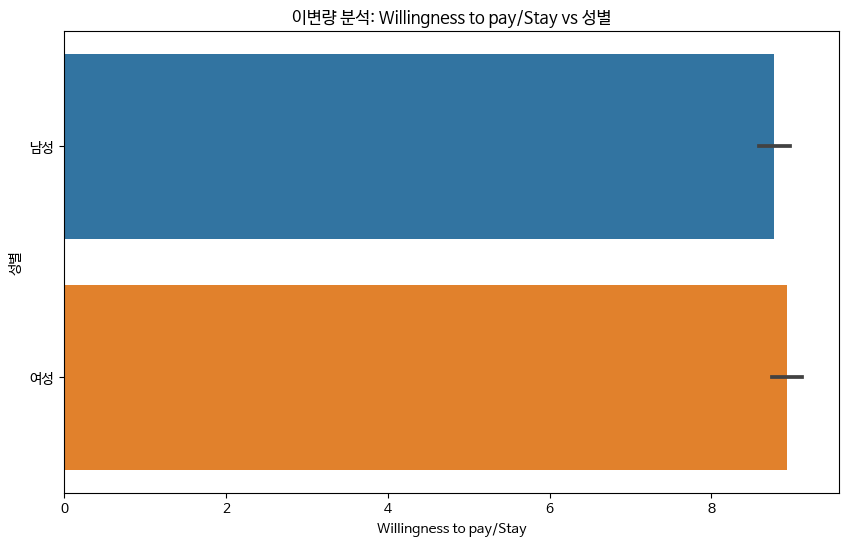

T-test Willingness to pay/Stay and 성별
T-statistic=-1.1182506941171821
P-value=0.2634823278002112
Willingness to pay/Stay와 성별와의 상관관계는 유의하지 않습니다.


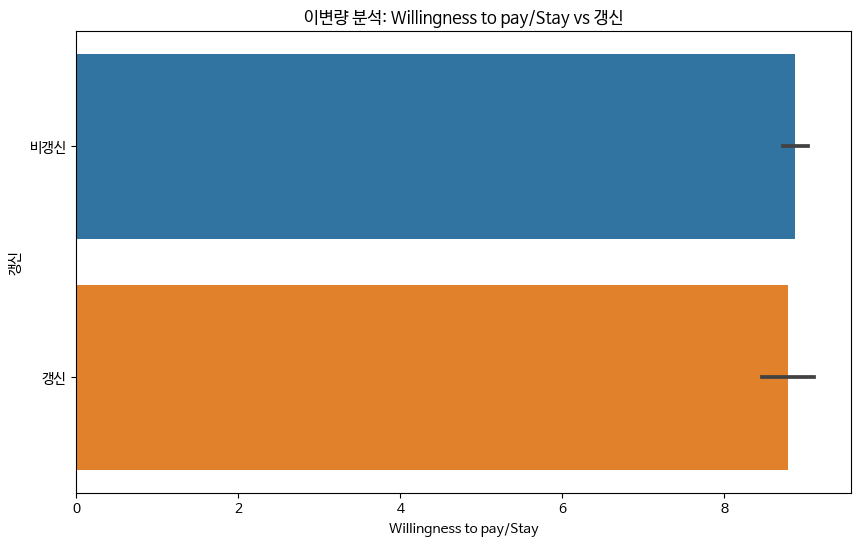

T-test Willingness to pay/Stay and 갱신
T-statistic=0.42495664483760925
P-value=0.6708759009384582
Willingness to pay/Stay와 갱신와의 상관관계는 유의하지 않습니다.


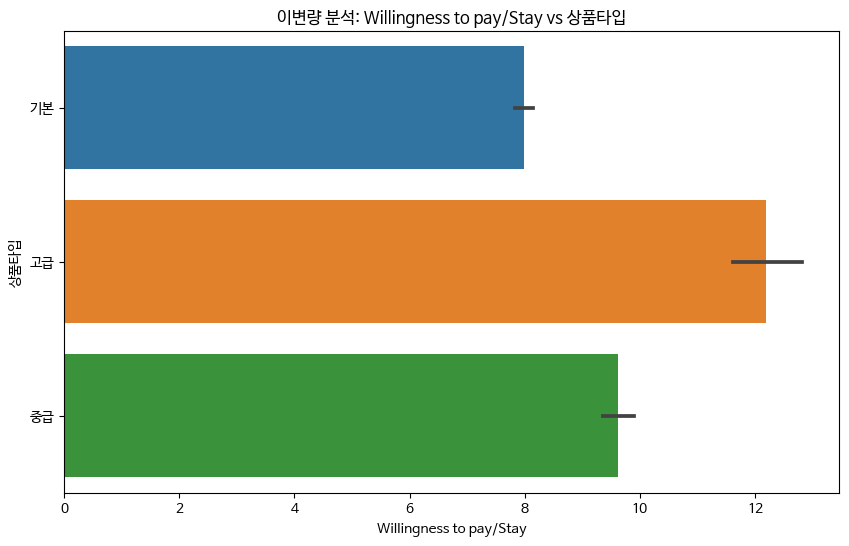

Chi-square Test for Independence between Willingness to pay/Stay and 상품타입:
Chi-squared statistic = 12771.334012406725
P-value = 0.0
Willingness to pay/Stay와 상품타입와의 상관관계는 유의합니다.


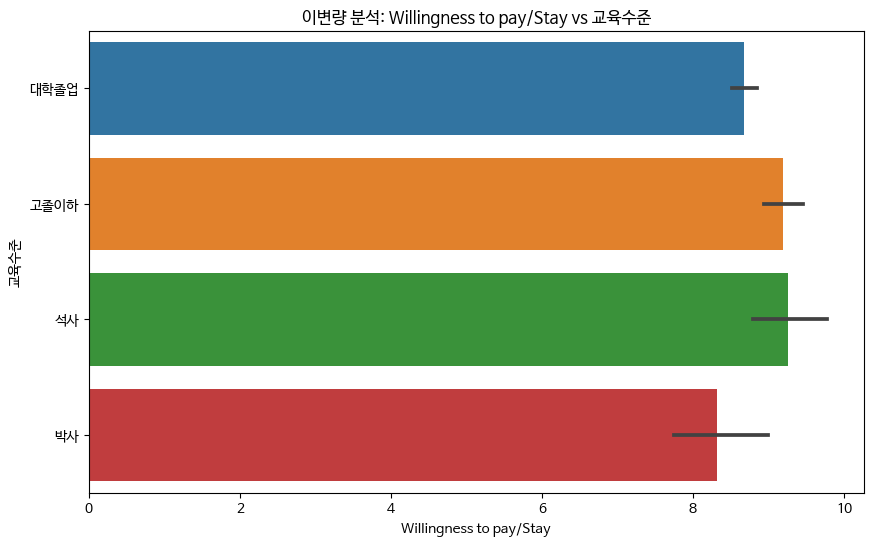

Chi-square Test for Independence between Willingness to pay/Stay and 교육수준:
Chi-squared statistic = 11184.037106146821
P-value = 8.820642786414171e-49
Willingness to pay/Stay와 교육수준와의 상관관계는 유의합니다.


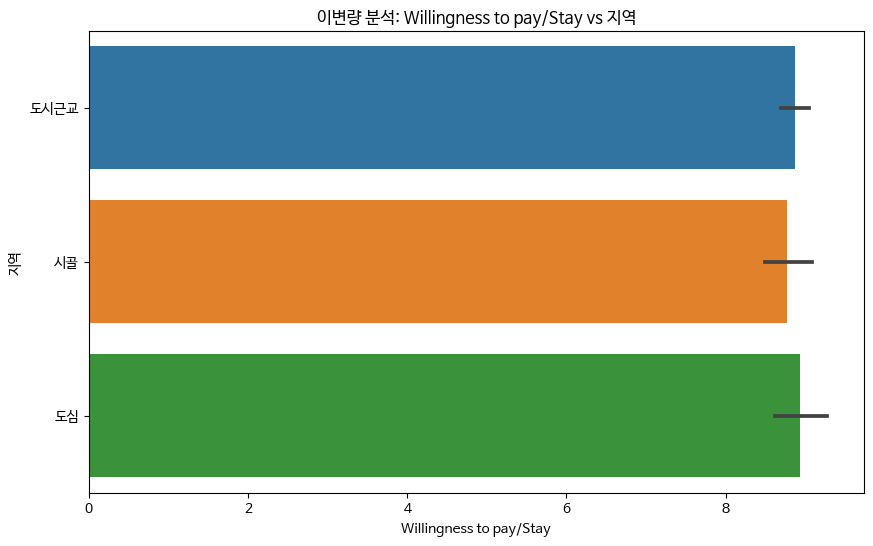

Chi-square Test for Independence between Willingness to pay/Stay and 지역:
Chi-squared statistic = 7305.192384874566
P-value = 3.0781435407425123e-27
Willingness to pay/Stay와 지역와의 상관관계는 유의합니다.


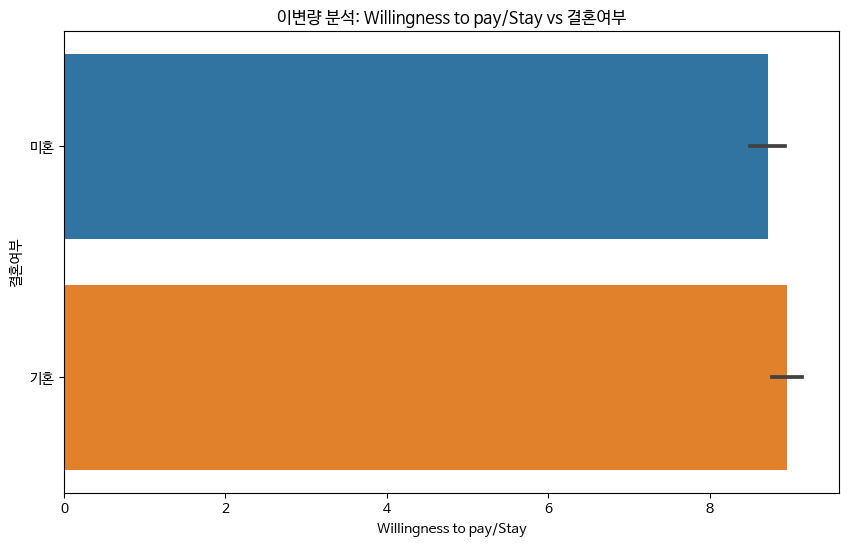

T-test Willingness to pay/Stay and 결혼여부
T-statistic=-1.6911035770916962
P-value=0.0908429940385082
Willingness to pay/Stay와 결혼여부와의 상관관계는 유의하지 않습니다.


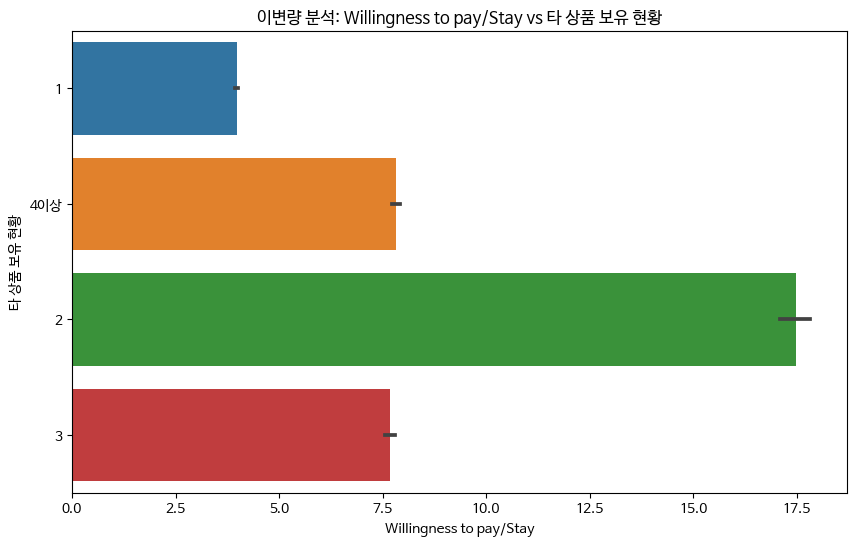

Chi-square Test for Independence between Willingness to pay/Stay and 타 상품 보유 현황:
Chi-squared statistic = 20590.685344845606
P-value = 0.0
Willingness to pay/Stay와 타 상품 보유 현황와의 상관관계는 유의합니다.


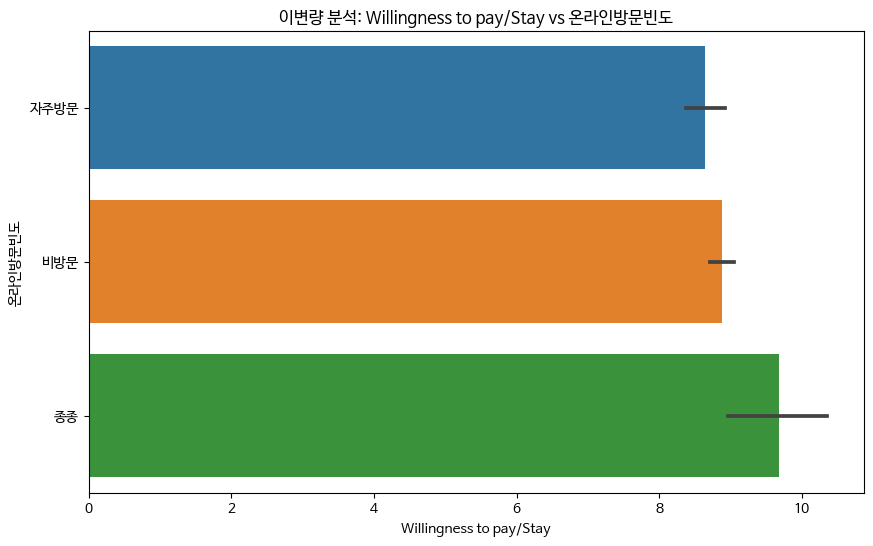

Chi-square Test for Independence between Willingness to pay/Stay and 온라인방문빈도:
Chi-squared statistic = 6316.401410549669
P-value = 0.007563654431966396
Willingness to pay/Stay와 온라인방문빈도와의 상관관계는 유의하지 않습니다.


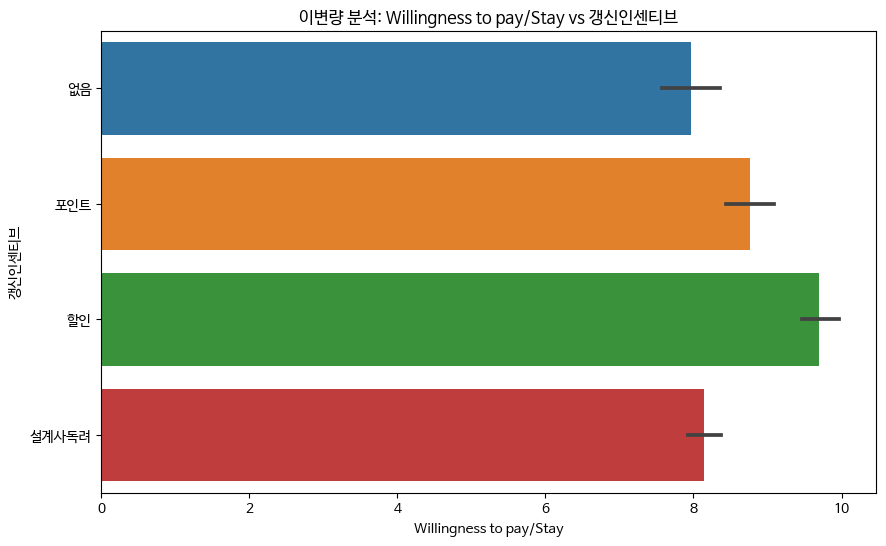

Chi-square Test for Independence between Willingness to pay/Stay and 갱신인센티브:
Chi-squared statistic = 10693.5717672498
P-value = 1.7737907871660845e-30
Willingness to pay/Stay와 갱신인센티브와의 상관관계는 유의합니다.


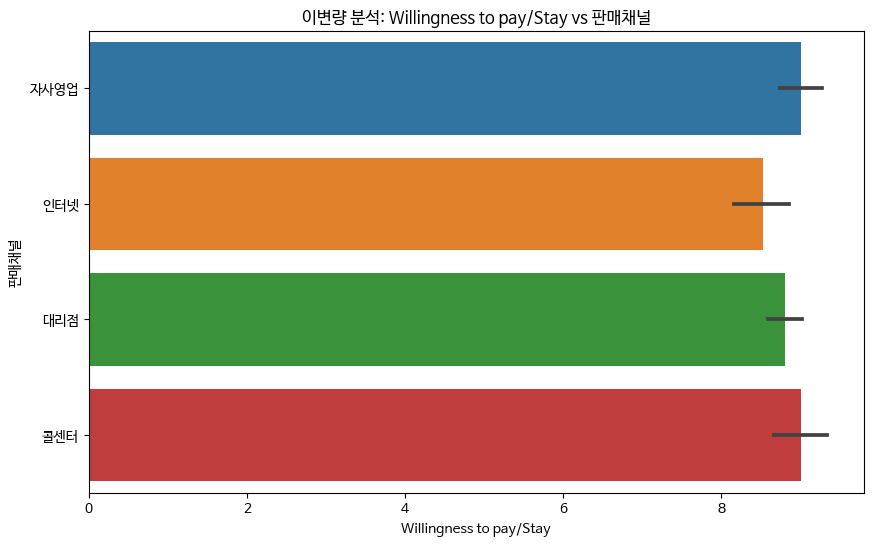

Chi-square Test for Independence between Willingness to pay/Stay and 판매채널:
Chi-squared statistic = 10757.493885001173
P-value = 1.2263042191038171e-32
Willingness to pay/Stay와 판매채널와의 상관관계는 유의합니다.


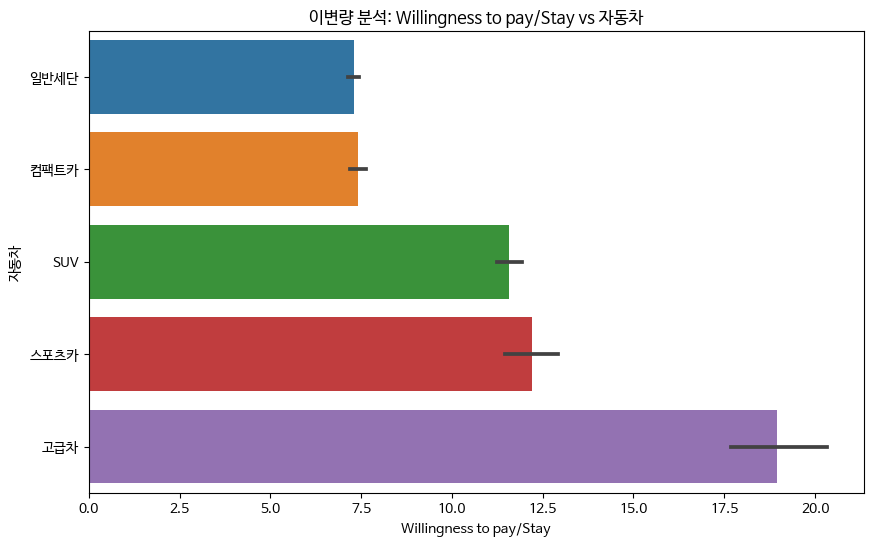

Chi-square Test for Independence between Willingness to pay/Stay and 자동차:
Chi-squared statistic = 21737.8141767118
P-value = 0.0
Willingness to pay/Stay와 자동차와의 상관관계는 유의합니다.


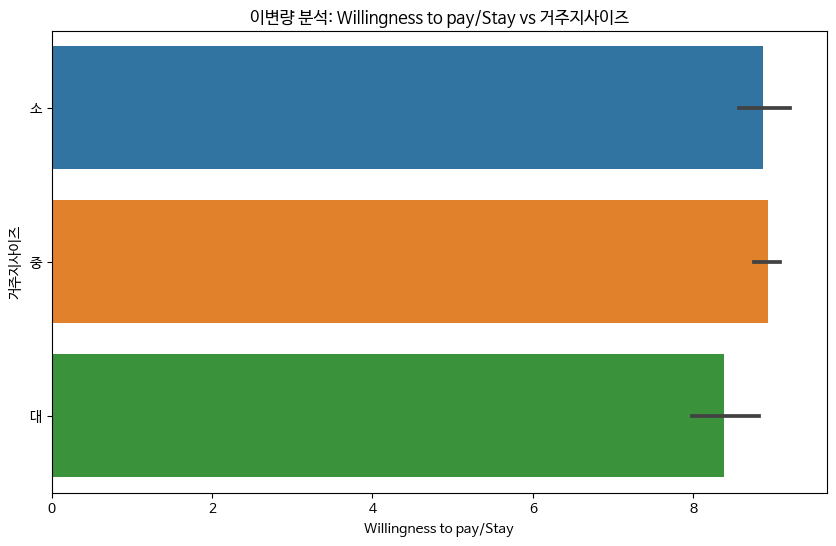

Chi-square Test for Independence between Willingness to pay/Stay and 거주지사이즈:
Chi-squared statistic = 7468.224804649447
P-value = 1.0275042977289528e-33
Willingness to pay/Stay와 거주지사이즈와의 상관관계는 유의합니다.


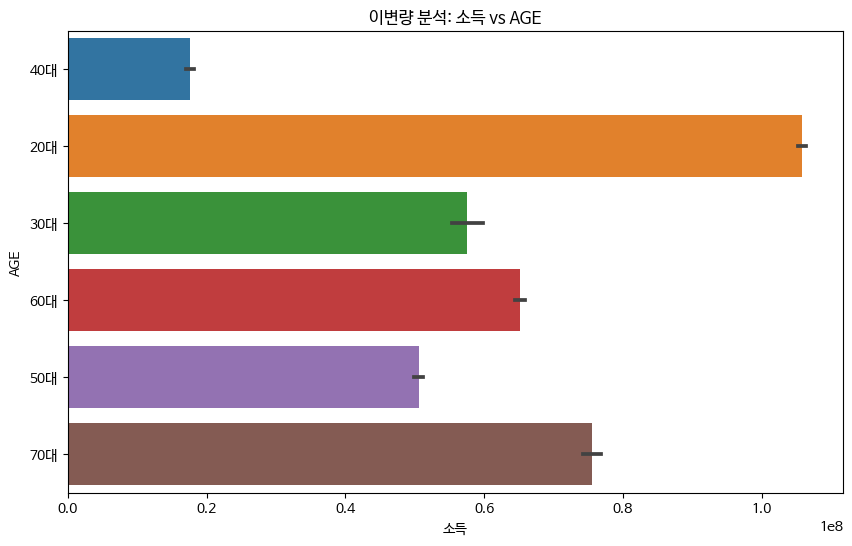

Chi-square Test for Independence between 소득 and AGE:
Chi-squared statistic = 54785.86667984325
P-value = 0.0
소득와 AGE와의 상관관계는 유의합니다.


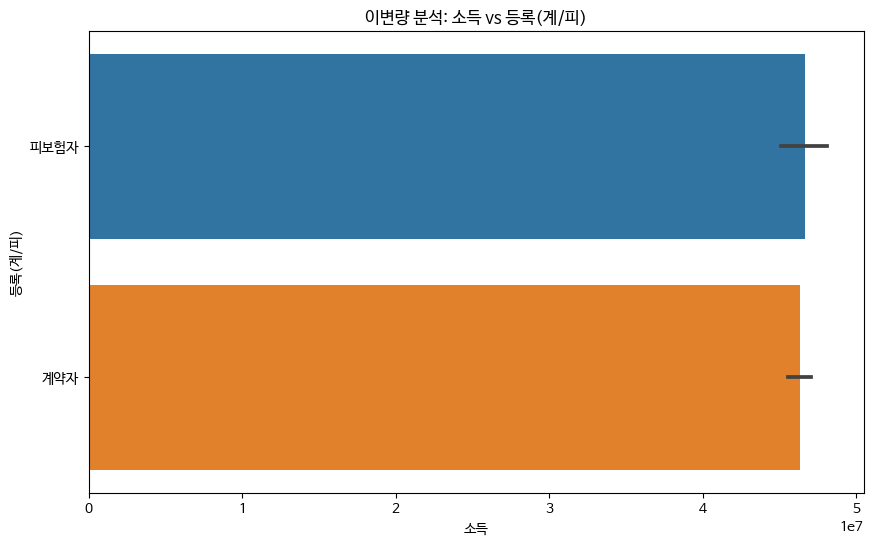

T-test 소득 and 등록(계/피)
T-statistic=0.3836146387027426
P-value=0.7012708857432512
소득와 등록(계/피)와의 상관관계는 유의하지 않습니다.


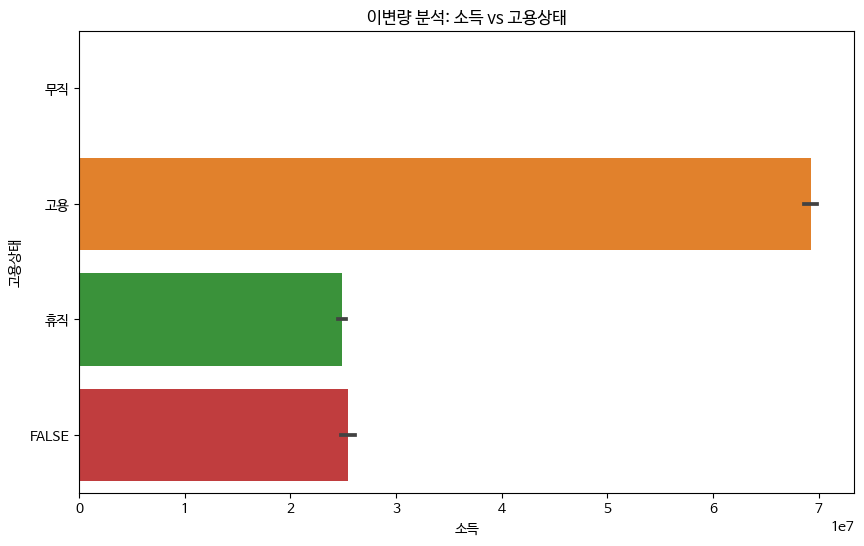

Chi-square Test for Independence between 소득 and 고용상태:
Chi-squared statistic = 35586.591970339345
P-value = 0.0
소득와 고용상태와의 상관관계는 유의합니다.


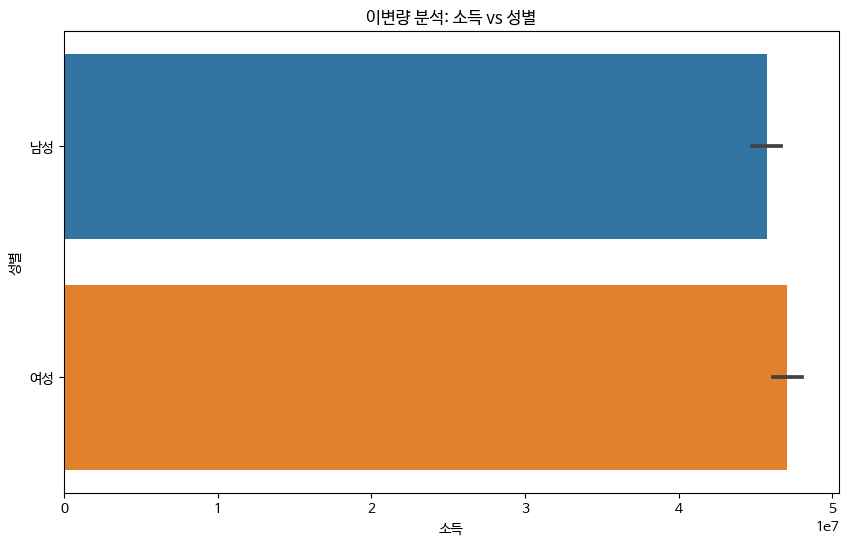

T-test 소득 and 성별
T-statistic=-1.9711777439778948
P-value=0.048726493765266346
소득와 성별와의 상관관계는 유의하지 않습니다.


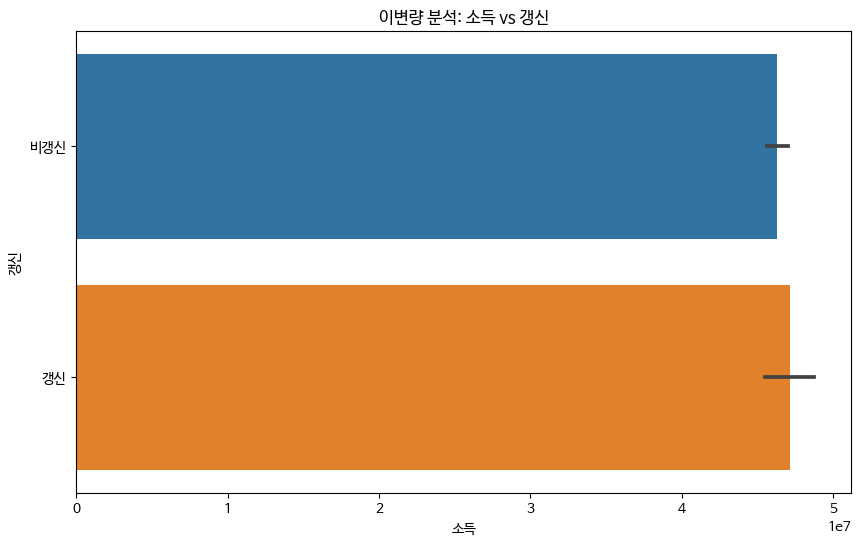

T-test 소득 and 갱신
T-statistic=-0.9114360068649454
P-value=0.36208400039631516
소득와 갱신와의 상관관계는 유의하지 않습니다.


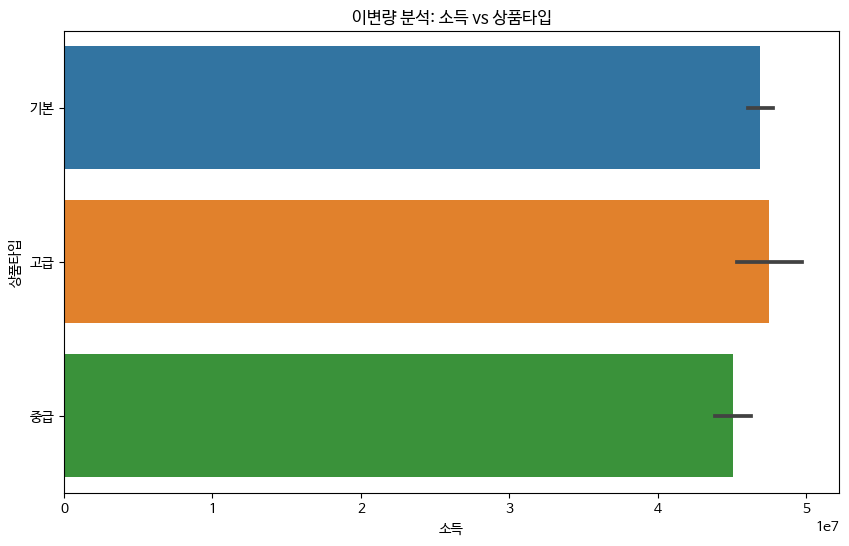

Chi-square Test for Independence between 소득 and 상품타입:
Chi-squared statistic = 17523.688140457823
P-value = 7.505306432116195e-35
소득와 상품타입와의 상관관계는 유의합니다.


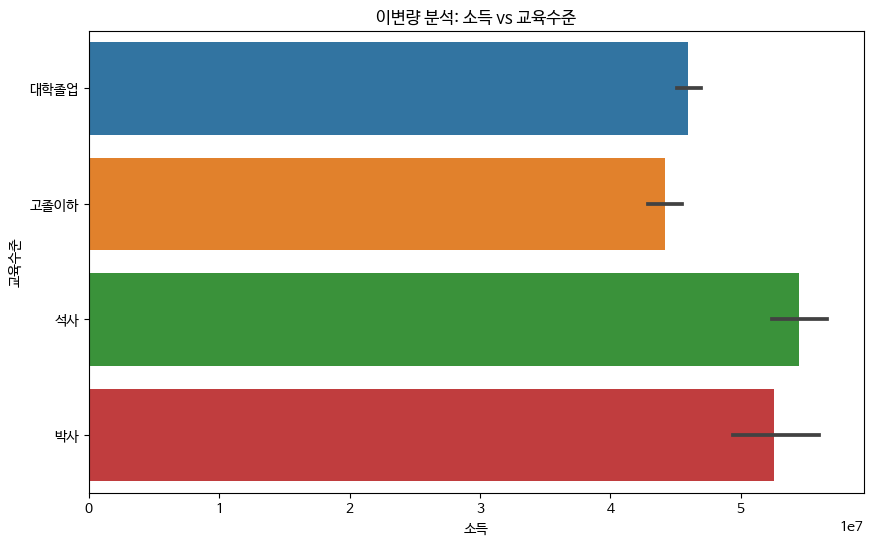

Chi-square Test for Independence between 소득 and 교육수준:
Chi-squared statistic = 28408.969565441195
P-value = 6.561089101874366e-126
소득와 교육수준와의 상관관계는 유의합니다.


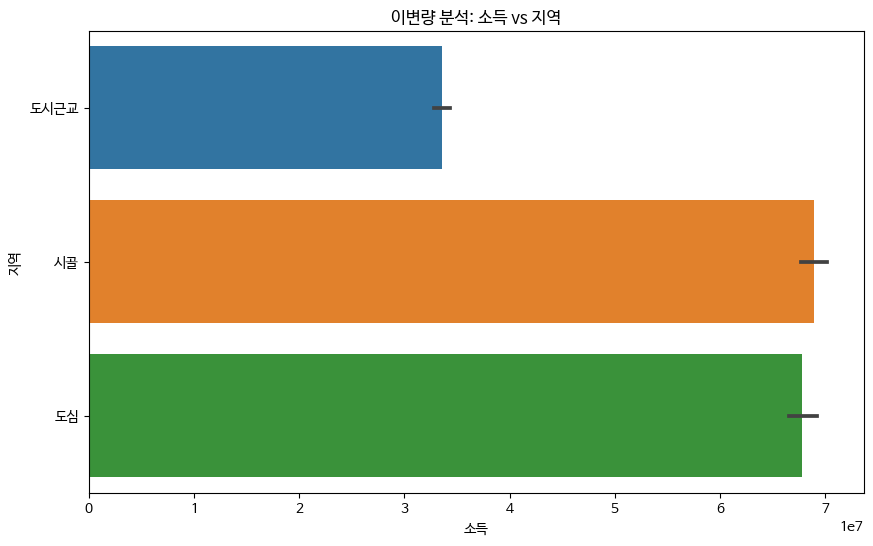

Chi-square Test for Independence between 소득 and 지역:
Chi-squared statistic = 21734.50246694597
P-value = 3.7763262196194024e-235
소득와 지역와의 상관관계는 유의합니다.


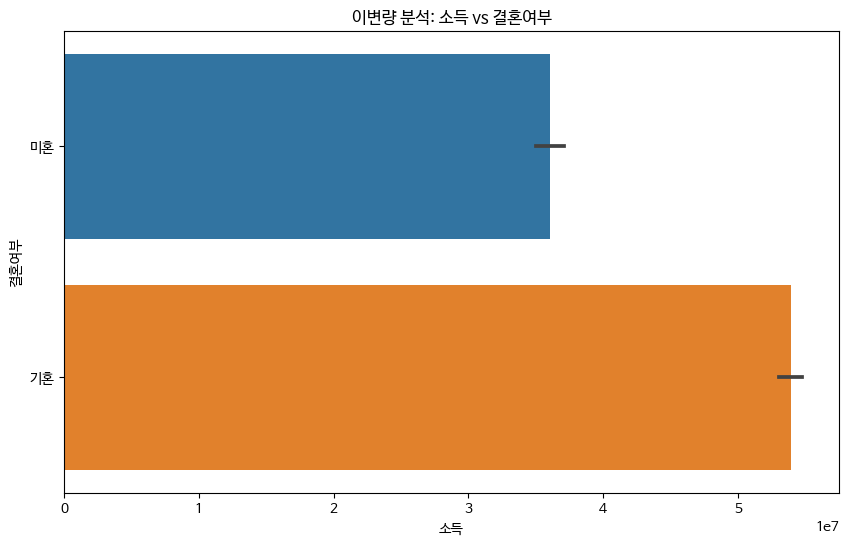

T-test 소득 and 결혼여부
T-statistic=-26.635484062968533
P-value=6.549011892188358e-152
소득와 결혼여부와의 상관관계는 유의합니다.


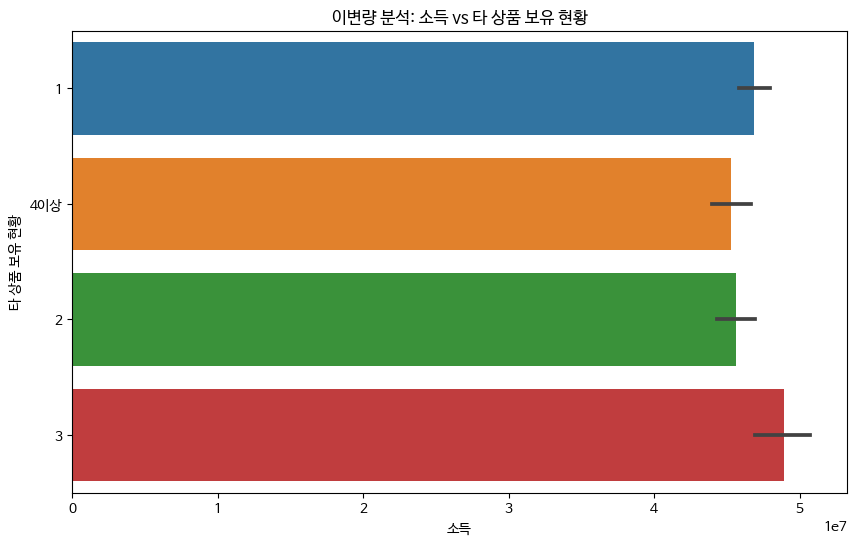

Chi-square Test for Independence between 소득 and 타 상품 보유 현황:
Chi-squared statistic = 26193.38954702583
P-value = 1.0576887043468446e-48
소득와 타 상품 보유 현황와의 상관관계는 유의합니다.


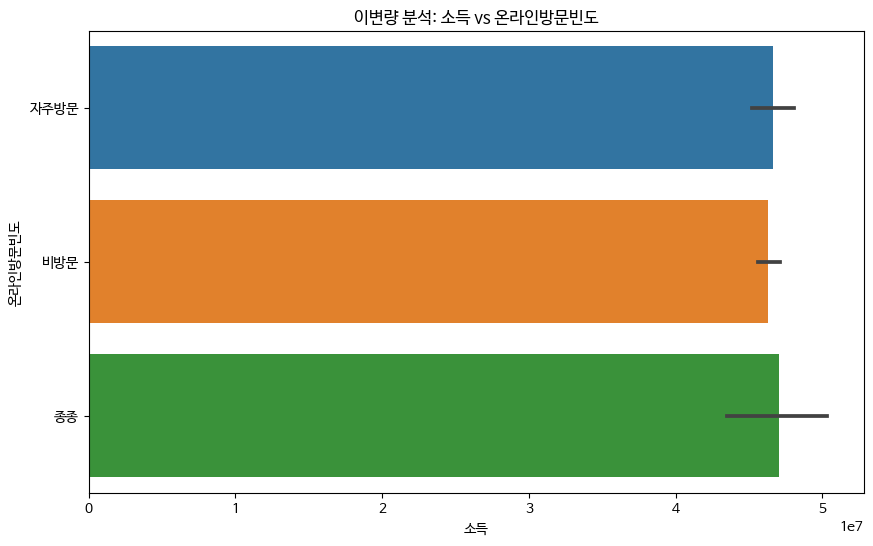

Chi-square Test for Independence between 소득 and 온라인방문빈도:
Chi-squared statistic = 15153.35462101737
P-value = 0.7650531793550068
소득와 온라인방문빈도와의 상관관계는 유의하지 않습니다.


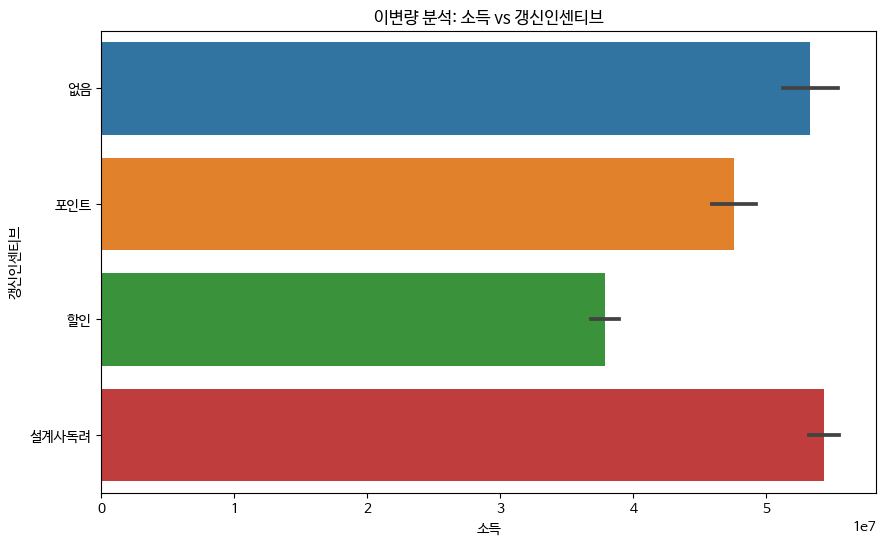

Chi-square Test for Independence between 소득 and 갱신인센티브:
Chi-squared statistic = 27108.45272111279
P-value = 1.3119796934088322e-76
소득와 갱신인센티브와의 상관관계는 유의합니다.


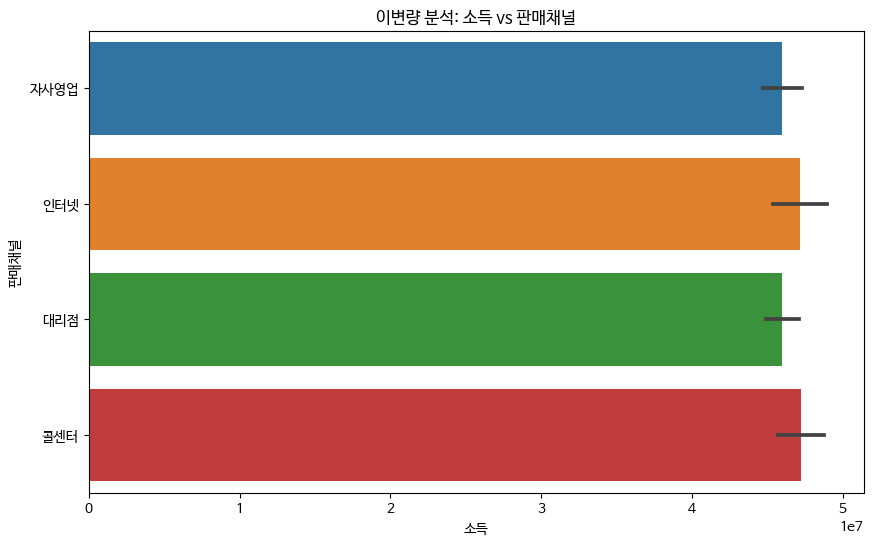

Chi-square Test for Independence between 소득 and 판매채널:
Chi-squared statistic = 26241.035700716733
P-value = 5.211278968726327e-50
소득와 판매채널와의 상관관계는 유의합니다.


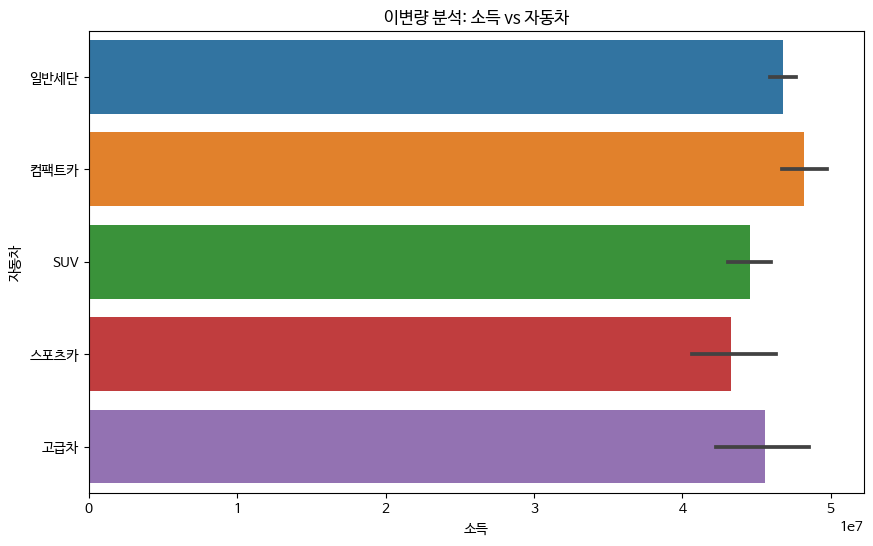

Chi-square Test for Independence between 소득 and 자동차:
Chi-squared statistic = 34585.15824071547
P-value = 2.678113577364721e-55
소득와 자동차와의 상관관계는 유의합니다.


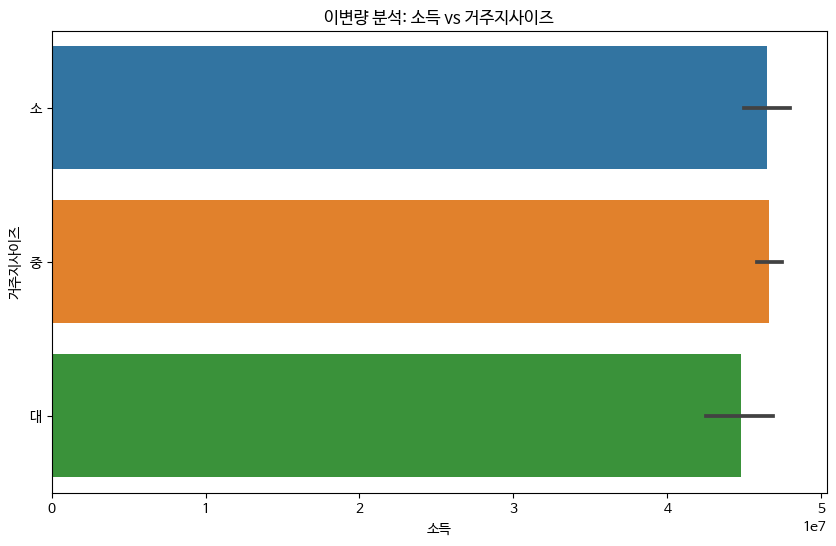

Chi-square Test for Independence between 소득 and 거주지사이즈:
Chi-squared statistic = 17263.81231408666
P-value = 6.0937369746472165e-28
소득와 거주지사이즈와의 상관관계는 유의합니다.


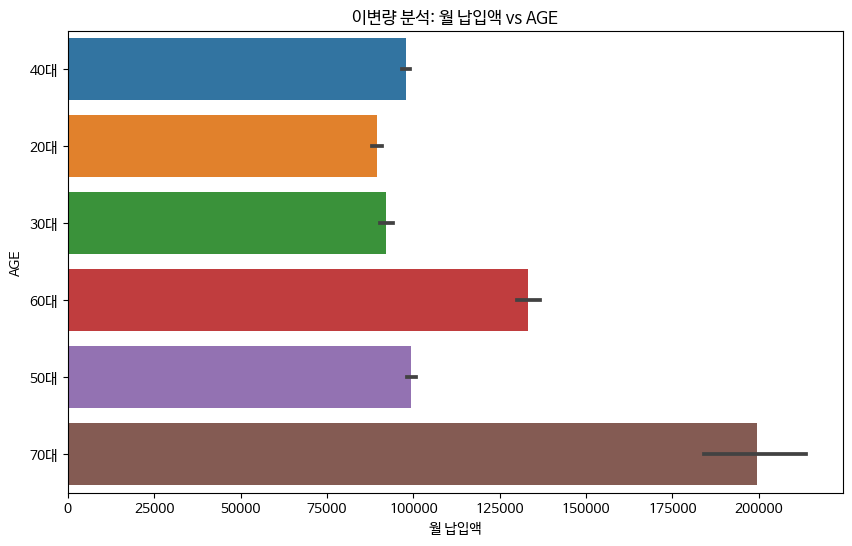

Chi-square Test for Independence between 월 납입액 and AGE:
Chi-squared statistic = 2197.8822885586187
P-value = 0.0
월 납입액와 AGE와의 상관관계는 유의합니다.


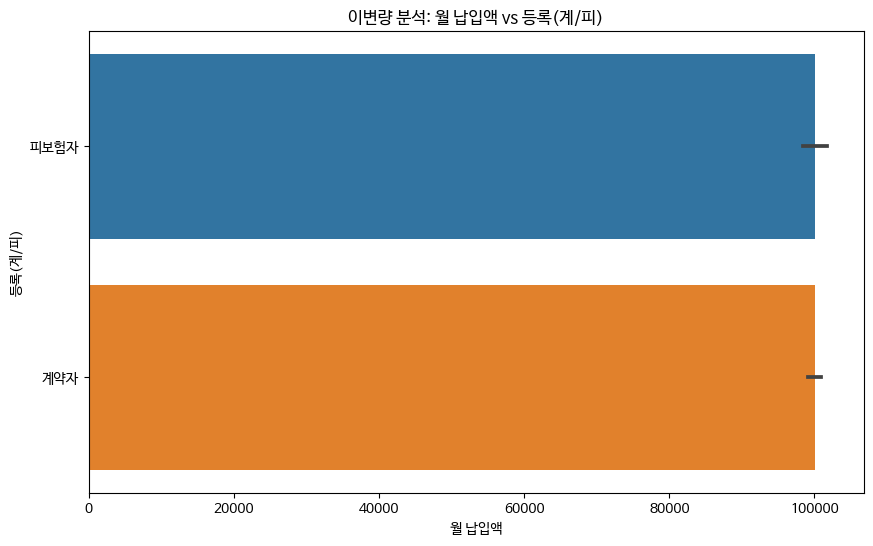

T-test 월 납입액 and 등록(계/피)
T-statistic=-0.015461648348460175
P-value=0.9876641381011456
월 납입액와 등록(계/피)와의 상관관계는 유의하지 않습니다.


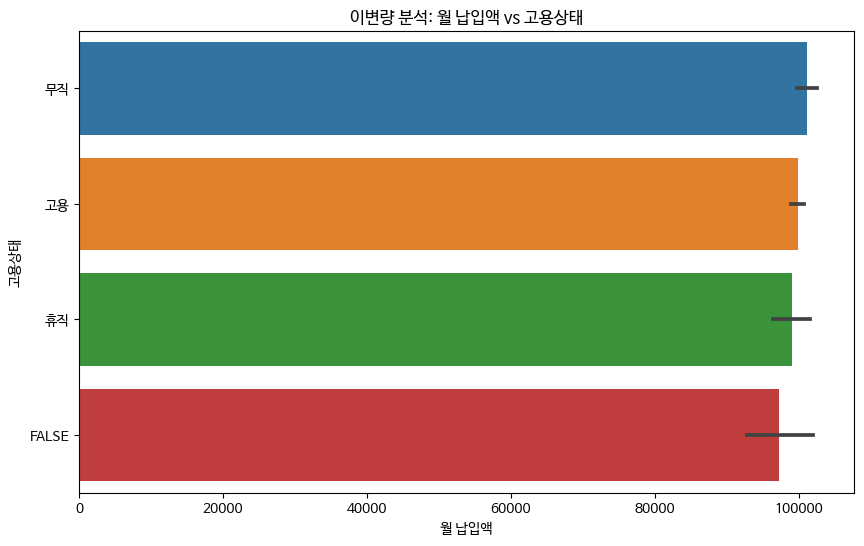

Chi-square Test for Independence between 월 납입액 and 고용상태:
Chi-squared statistic = 281.387286071999
P-value = 2.4568368725154054e-22
월 납입액와 고용상태와의 상관관계는 유의합니다.


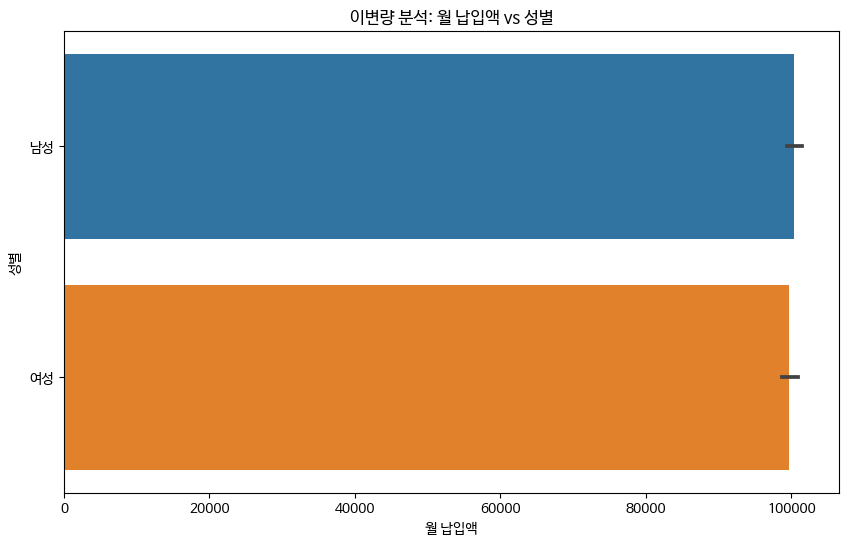

T-test 월 납입액 and 성별
T-statistic=0.8194129045644492
P-value=0.4125671511139657
월 납입액와 성별와의 상관관계는 유의하지 않습니다.


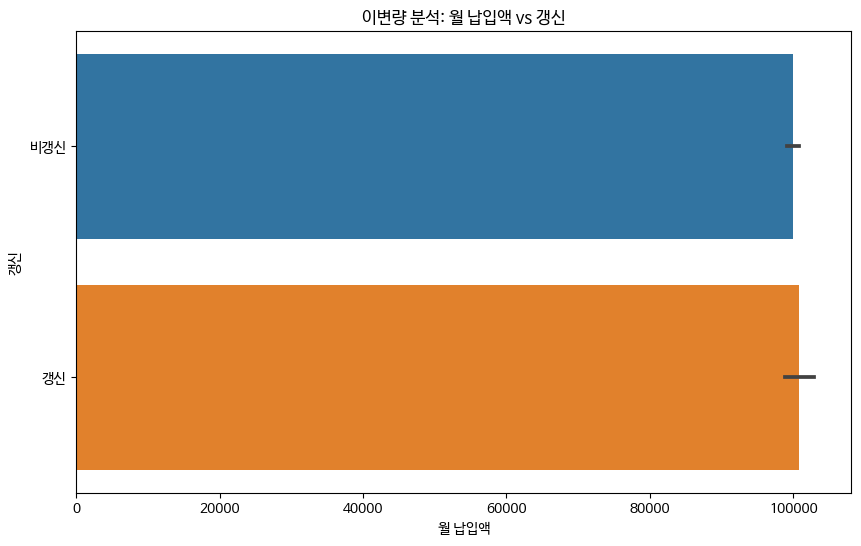

T-test 월 납입액 and 갱신
T-statistic=-0.8150974978953082
P-value=0.4150326829721154
월 납입액와 갱신와의 상관관계는 유의하지 않습니다.


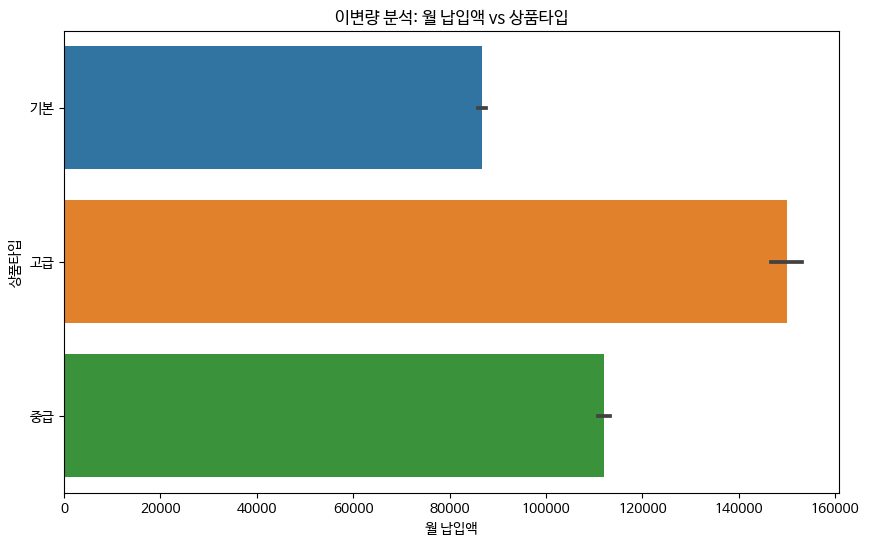

Chi-square Test for Independence between 월 납입액 and 상품타입:
Chi-squared statistic = 13065.012997718999
P-value = 0.0
월 납입액와 상품타입와의 상관관계는 유의합니다.


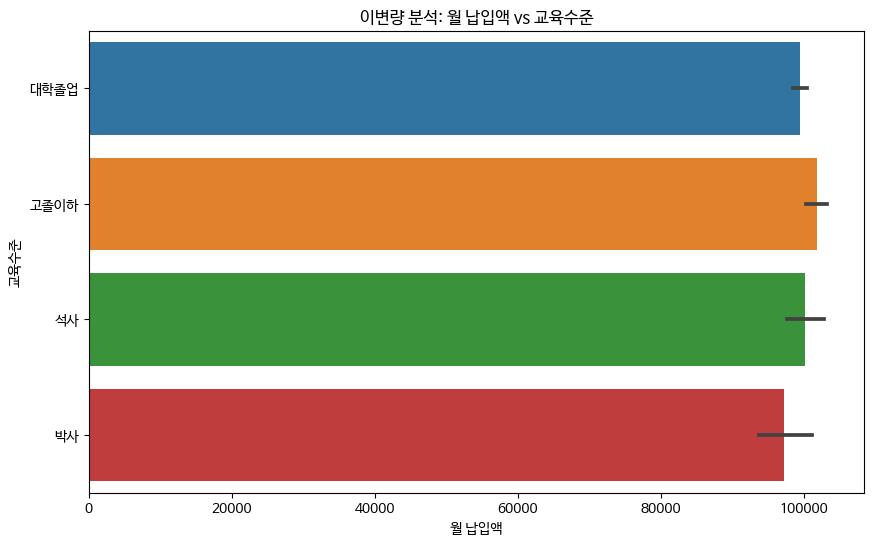

Chi-square Test for Independence between 월 납입액 and 교육수준:
Chi-squared statistic = 135.52655300446563
P-value = 0.0006753845705760188
월 납입액와 교육수준와의 상관관계는 유의합니다.


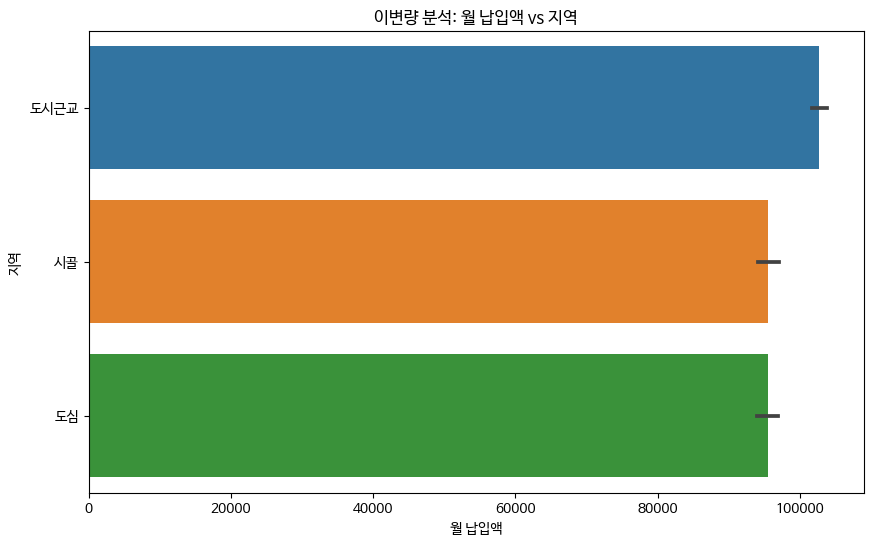

Chi-square Test for Independence between 월 납입액 and 지역:
Chi-squared statistic = 168.26425869543607
P-value = 1.1188376417798536e-12
월 납입액와 지역와의 상관관계는 유의합니다.


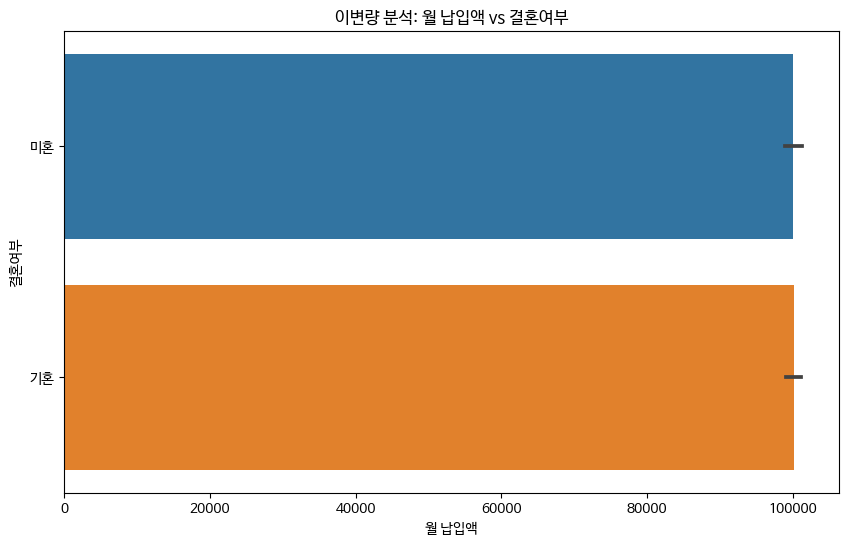

T-test 월 납입액 and 결혼여부
T-statistic=-0.03571919144422761
P-value=0.9715068619732175
월 납입액와 결혼여부와의 상관관계는 유의하지 않습니다.


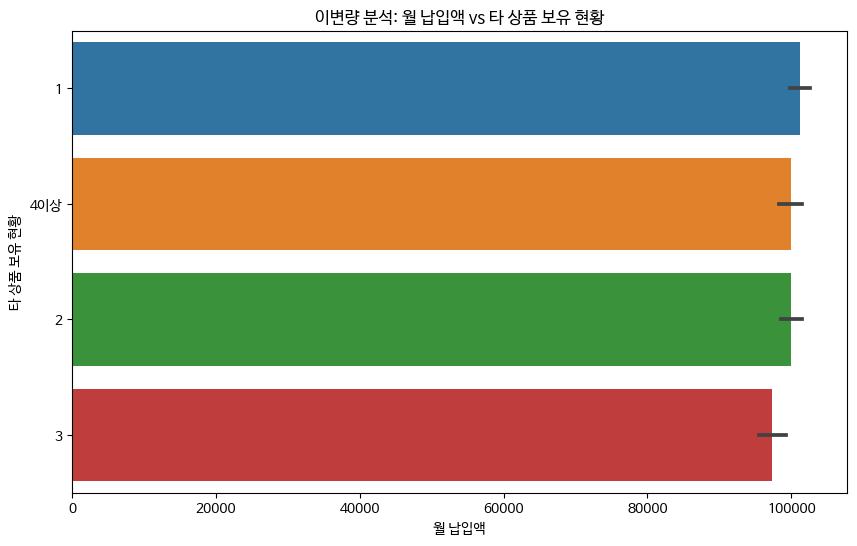

Chi-square Test for Independence between 월 납입액 and 타 상품 보유 현황:
Chi-squared statistic = 207.63752417238635
P-value = 7.323228136606343e-12
월 납입액와 타 상품 보유 현황와의 상관관계는 유의합니다.


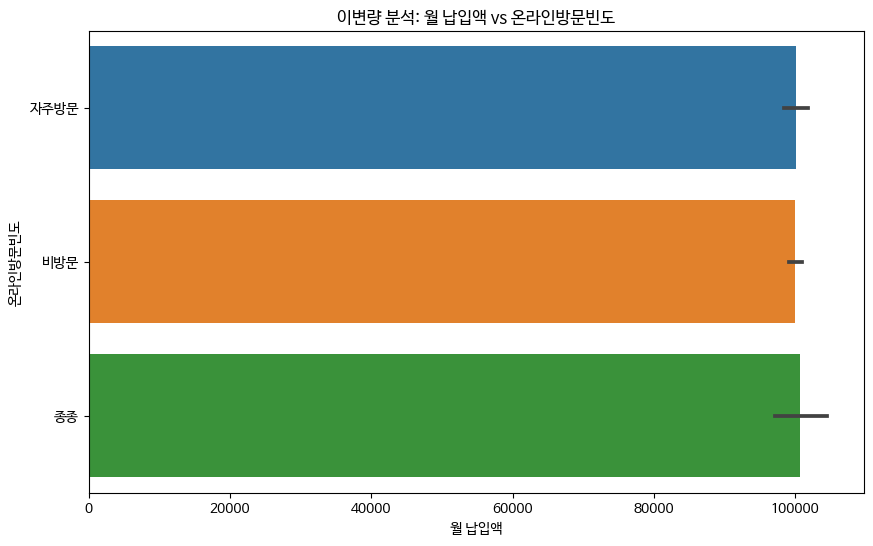

Chi-square Test for Independence between 월 납입액 and 온라인방문빈도:
Chi-squared statistic = 88.49931591514851
P-value = 0.0060825227280815125
월 납입액와 온라인방문빈도와의 상관관계는 유의하지 않습니다.


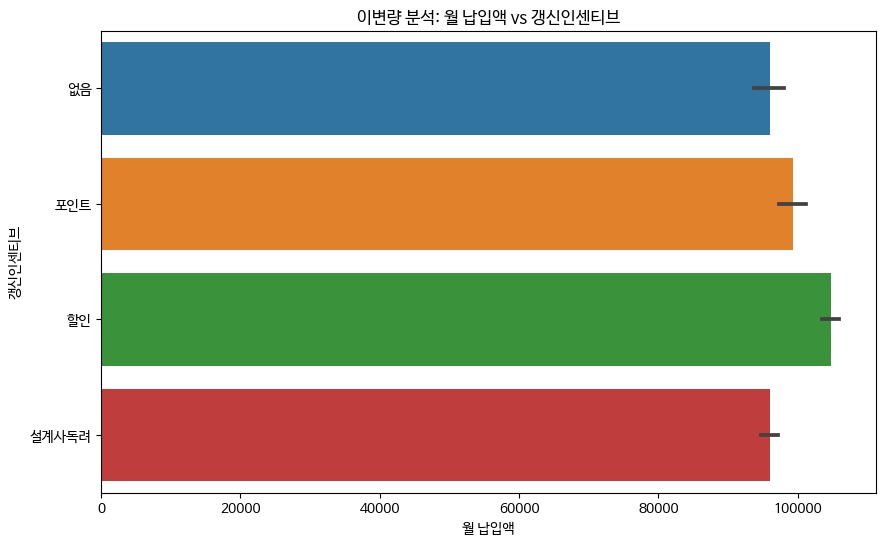

Chi-square Test for Independence between 월 납입액 and 갱신인센티브:
Chi-squared statistic = 324.00644582283064
P-value = 5.192556187128849e-29
월 납입액와 갱신인센티브와의 상관관계는 유의합니다.


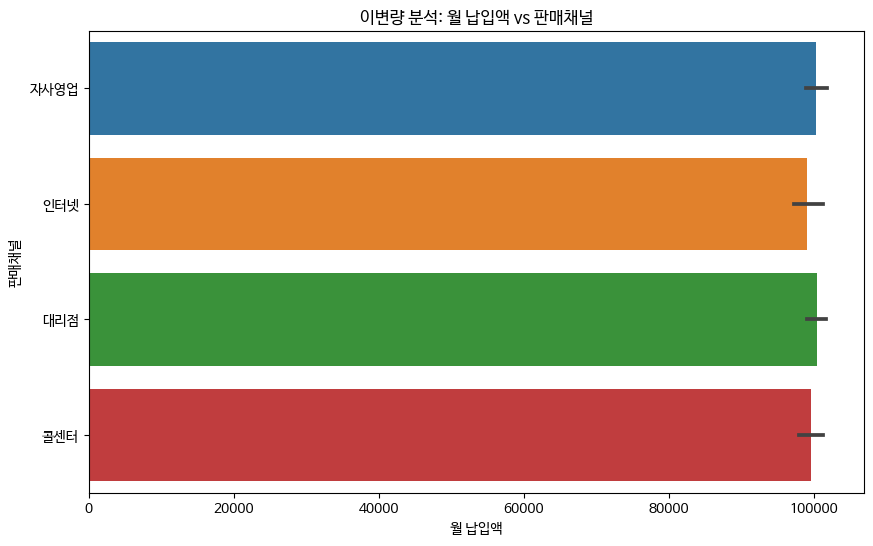

Chi-square Test for Independence between 월 납입액 and 판매채널:
Chi-squared statistic = 187.45303053531296
P-value = 2.465606868044025e-09
월 납입액와 판매채널와의 상관관계는 유의합니다.


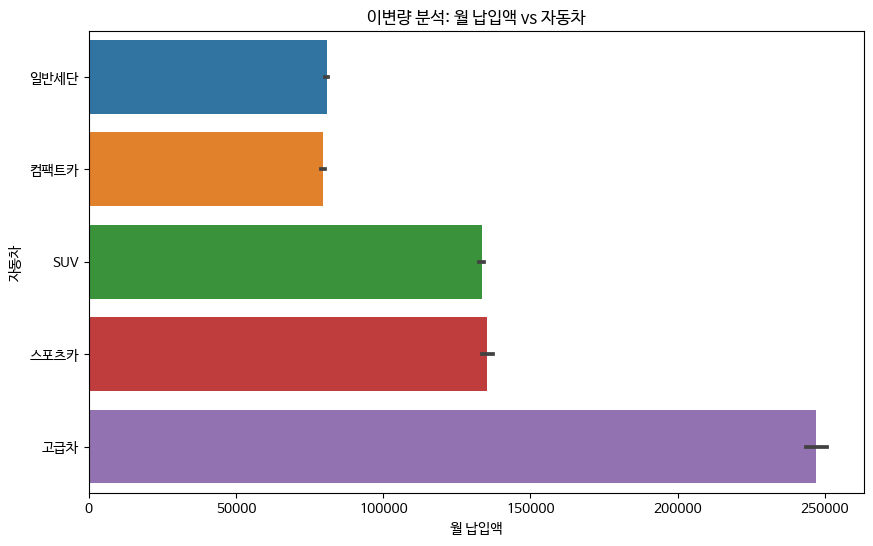

Chi-square Test for Independence between 월 납입액 and 자동차:
Chi-squared statistic = 18905.991749764362
P-value = 0.0
월 납입액와 자동차와의 상관관계는 유의합니다.


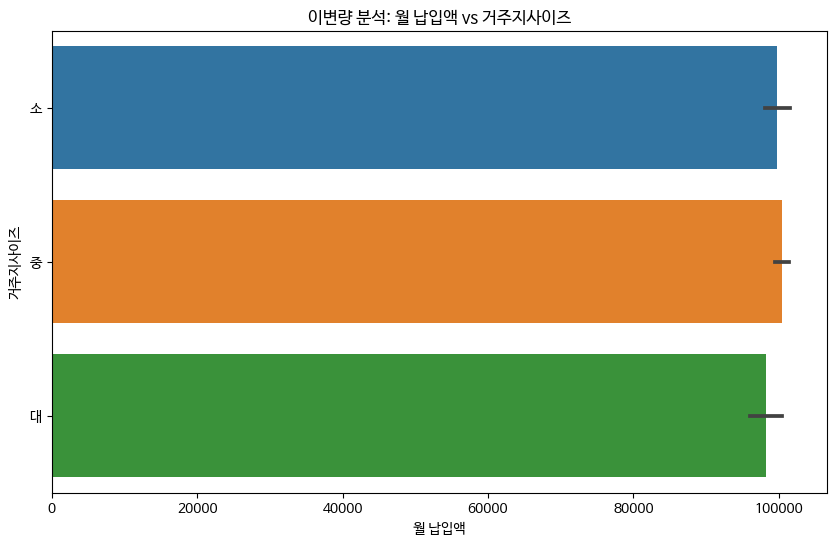

Chi-square Test for Independence between 월 납입액 and 거주지사이즈:
Chi-squared statistic = 108.09352854440444
P-value = 7.290937914332323e-05
월 납입액와 거주지사이즈와의 상관관계는 유의합니다.


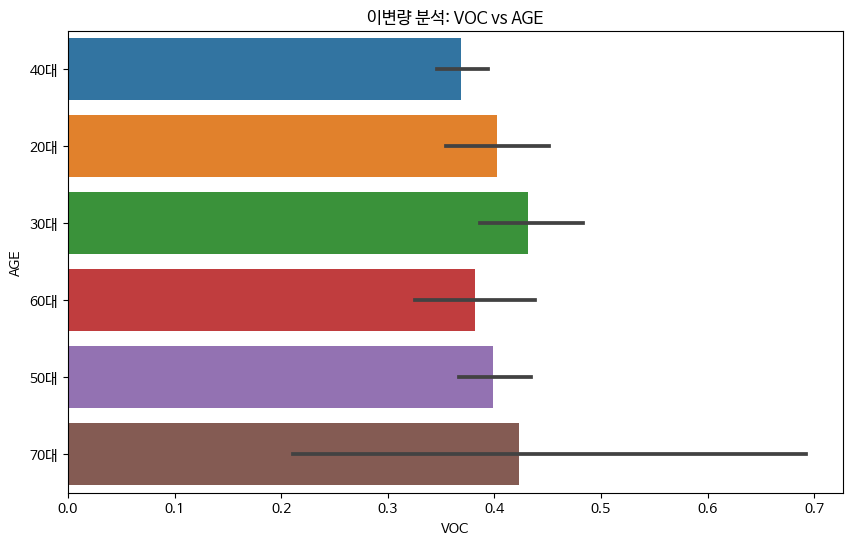

Chi-square Test for Independence between VOC and AGE:
Chi-squared statistic = 37.76656195401829
P-value = 0.04874461295329639
VOC와 AGE와의 상관관계는 유의하지 않습니다.


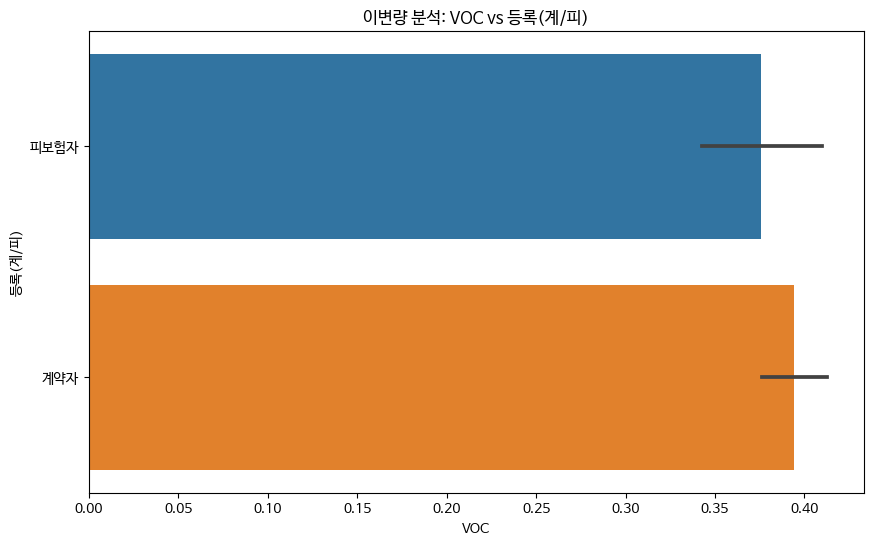

T-test VOC and 등록(계/피)
T-statistic=-0.911083346750395
P-value=0.36226976405588907
VOC와 등록(계/피)와의 상관관계는 유의하지 않습니다.


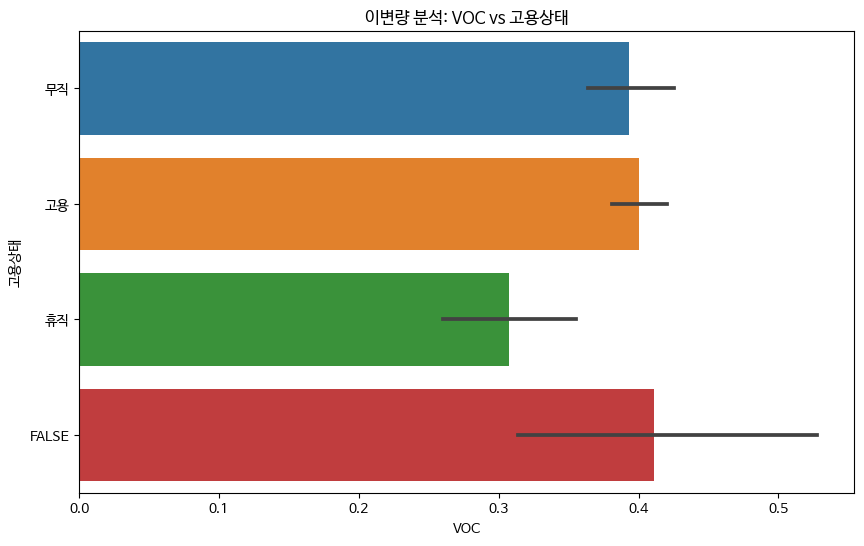

Chi-square Test for Independence between VOC and 고용상태:
Chi-squared statistic = 58.832421466012725
P-value = 3.999340860920325e-07
VOC와 고용상태와의 상관관계는 유의합니다.


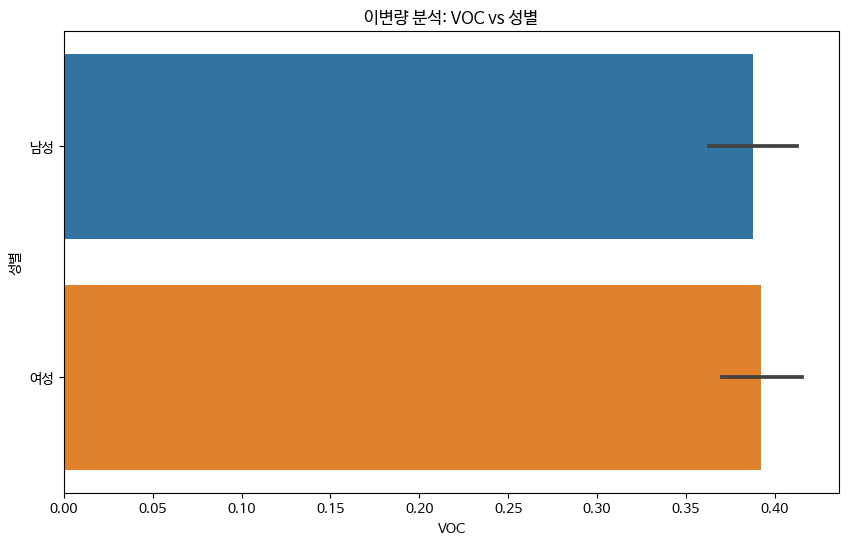

T-test VOC and 성별
T-statistic=-0.2753469459308879
P-value=0.7830544417228911
VOC와 성별와의 상관관계는 유의하지 않습니다.


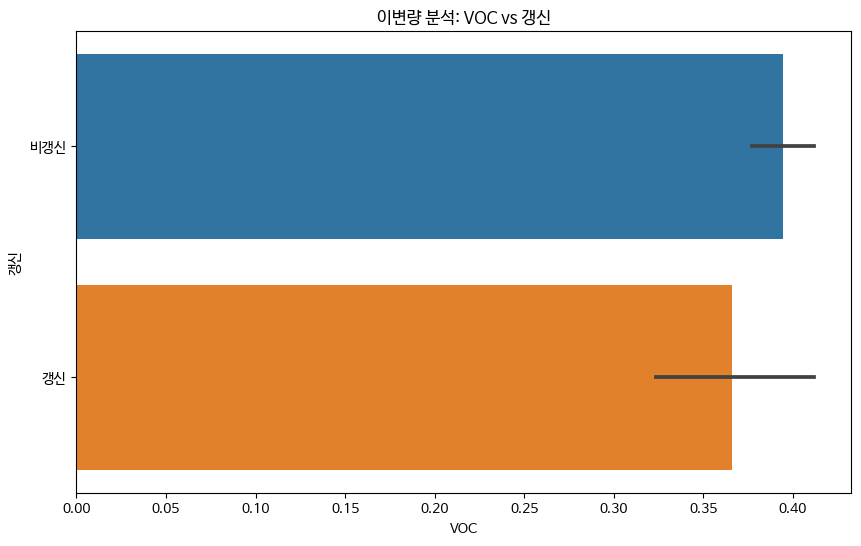

T-test VOC and 갱신
T-statistic=1.1775425547772809
P-value=0.2390023800713263
VOC와 갱신와의 상관관계는 유의하지 않습니다.


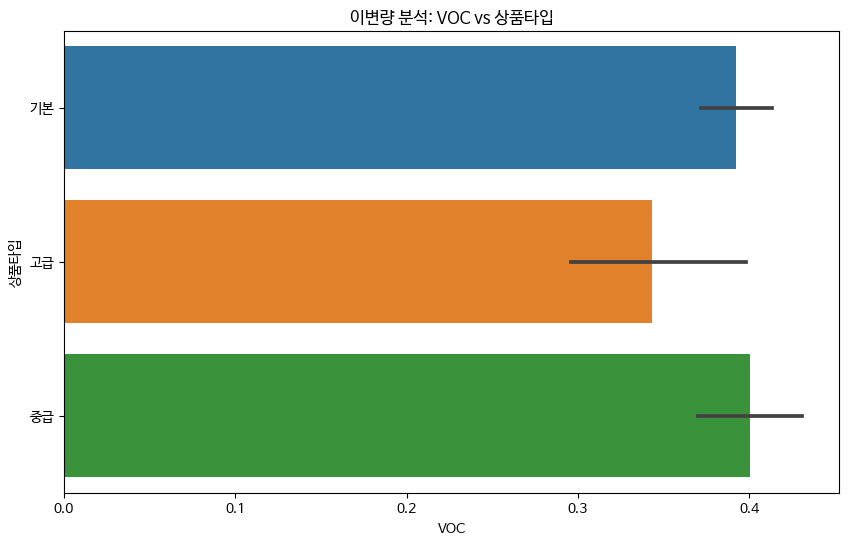

Chi-square Test for Independence between VOC and 상품타입:
Chi-squared statistic = 15.95070228172168
P-value = 0.1010523270284695
VOC와 상품타입와의 상관관계는 유의하지 않습니다.


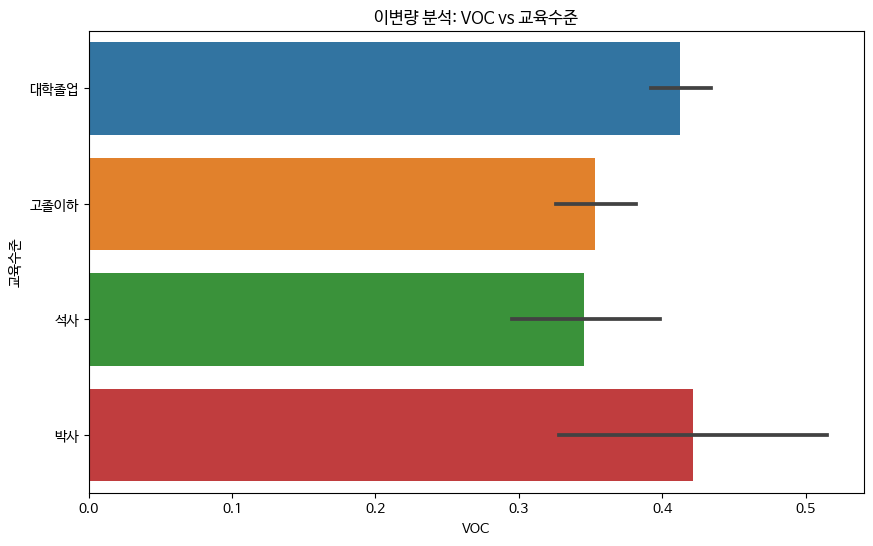

Chi-square Test for Independence between VOC and 교육수준:
Chi-squared statistic = 28.55007941346131
P-value = 0.0183686906314102
VOC와 교육수준와의 상관관계는 유의하지 않습니다.


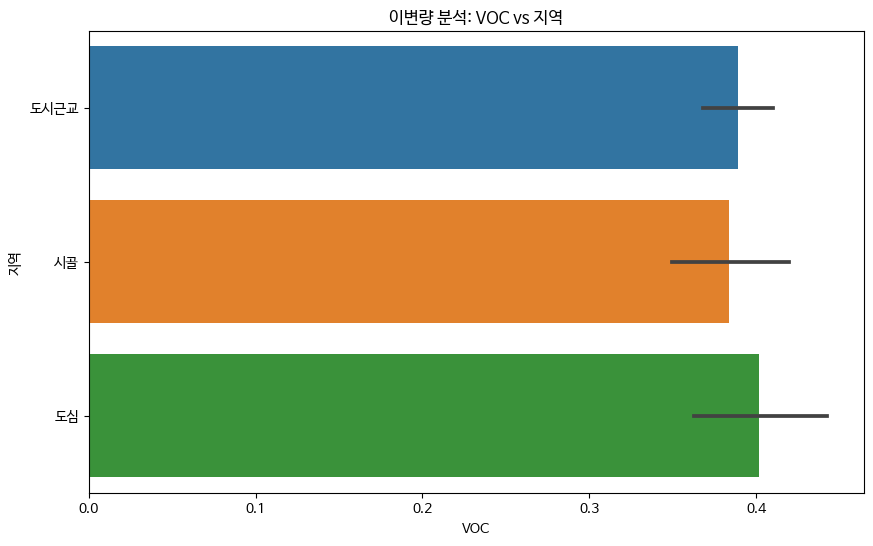

Chi-square Test for Independence between VOC and 지역:
Chi-squared statistic = 16.149827691806625
P-value = 0.09542298658060297
VOC와 지역와의 상관관계는 유의하지 않습니다.


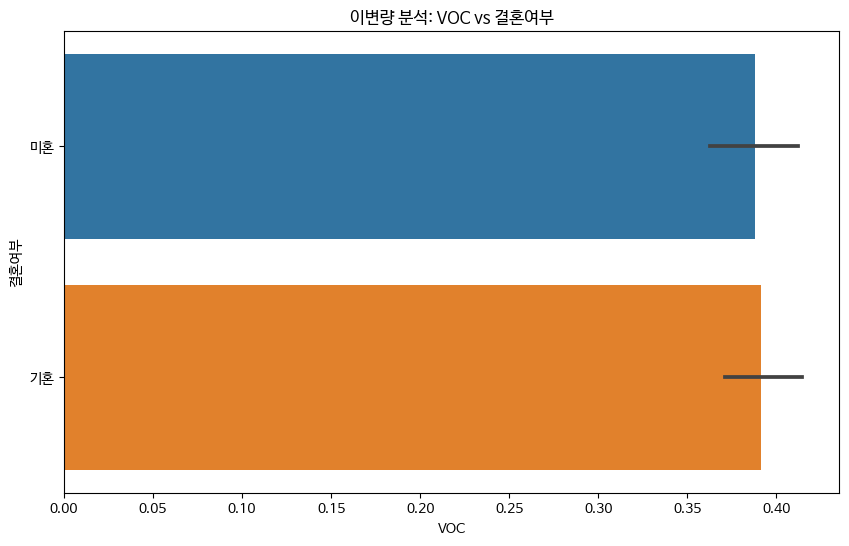

T-test VOC and 결혼여부
T-statistic=-0.213379297399495
P-value=0.8310347524633057
VOC와 결혼여부와의 상관관계는 유의하지 않습니다.


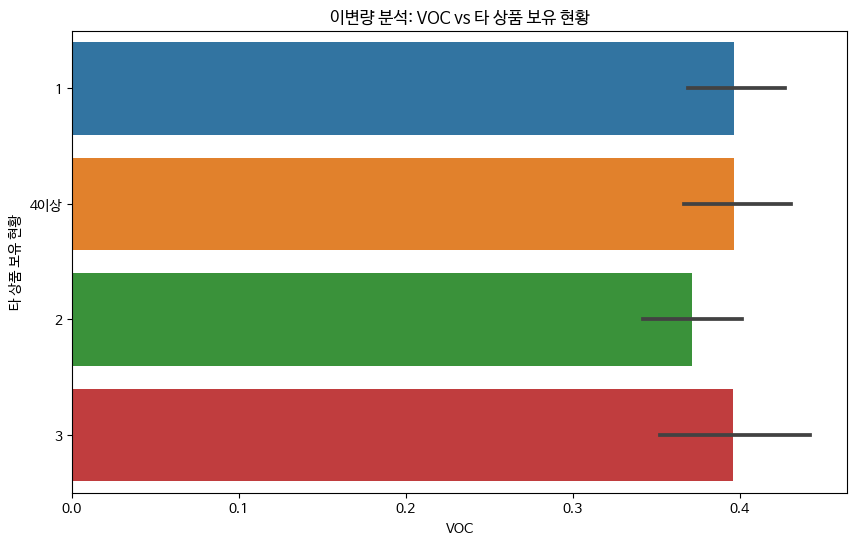

Chi-square Test for Independence between VOC and 타 상품 보유 현황:
Chi-squared statistic = 20.43699790783247
P-value = 0.15580198337733928
VOC와 타 상품 보유 현황와의 상관관계는 유의하지 않습니다.


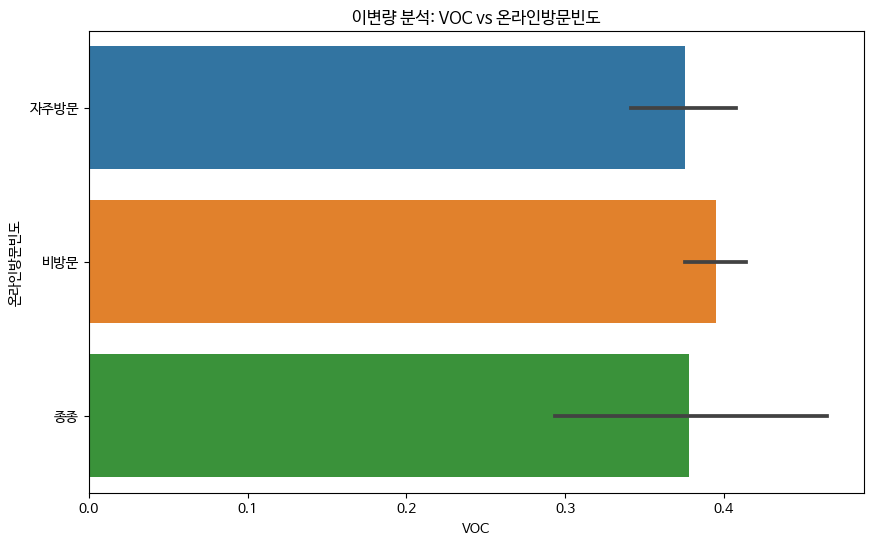

Chi-square Test for Independence between VOC and 온라인방문빈도:
Chi-squared statistic = 26.15970829633612
P-value = 0.0035312220097429136
VOC와 온라인방문빈도와의 상관관계는 유의합니다.


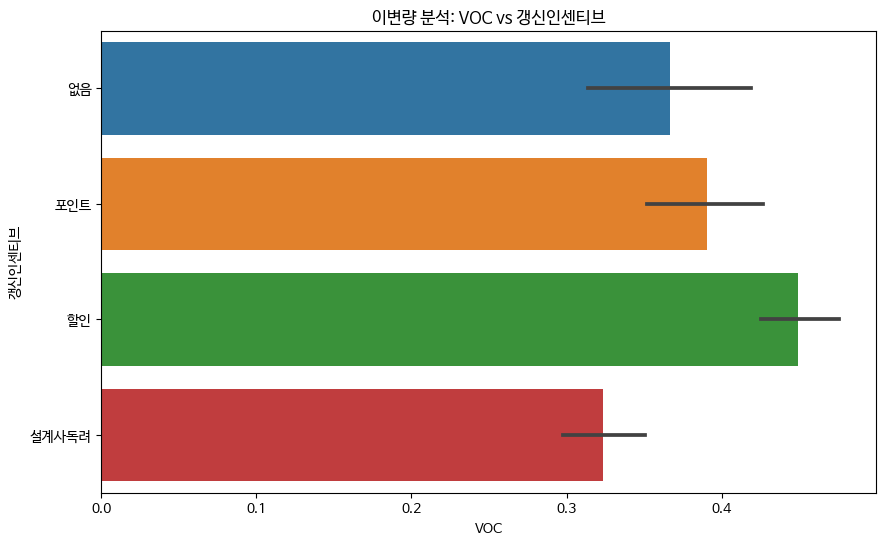

Chi-square Test for Independence between VOC and 갱신인센티브:
Chi-squared statistic = 145.62183316983814
P-value = 1.7813746586588e-23
VOC와 갱신인센티브와의 상관관계는 유의합니다.


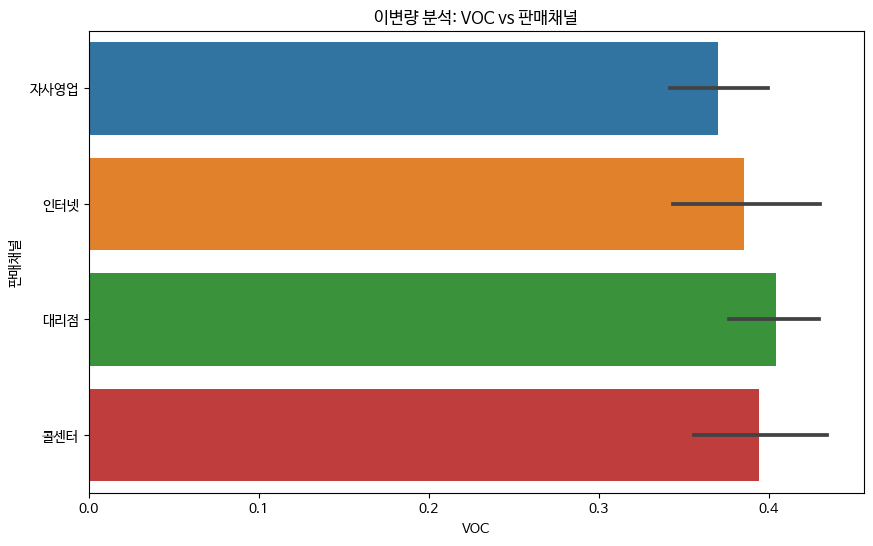

Chi-square Test for Independence between VOC and 판매채널:
Chi-squared statistic = 39.04990766438514
P-value = 0.0006299420156403937
VOC와 판매채널와의 상관관계는 유의합니다.


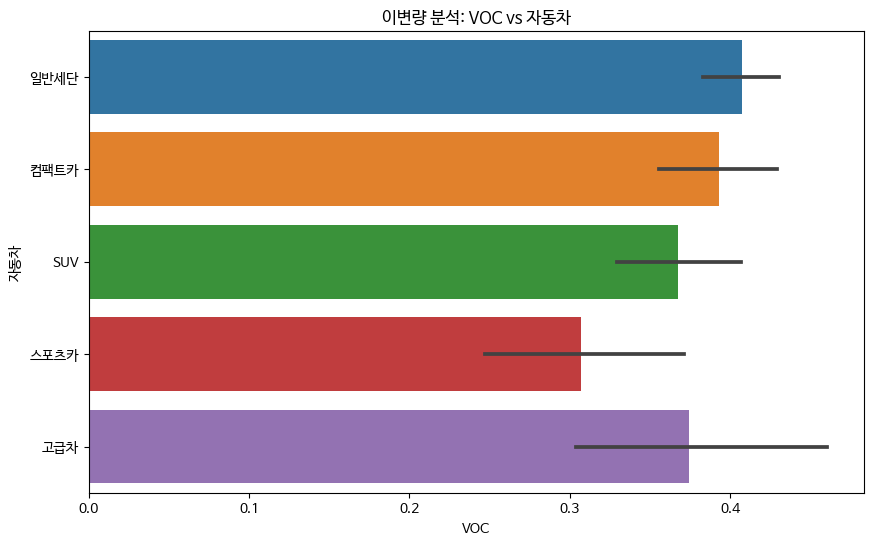

Chi-square Test for Independence between VOC and 자동차:
Chi-squared statistic = 30.415611240729707
P-value = 0.06339337049143526
VOC와 자동차와의 상관관계는 유의하지 않습니다.


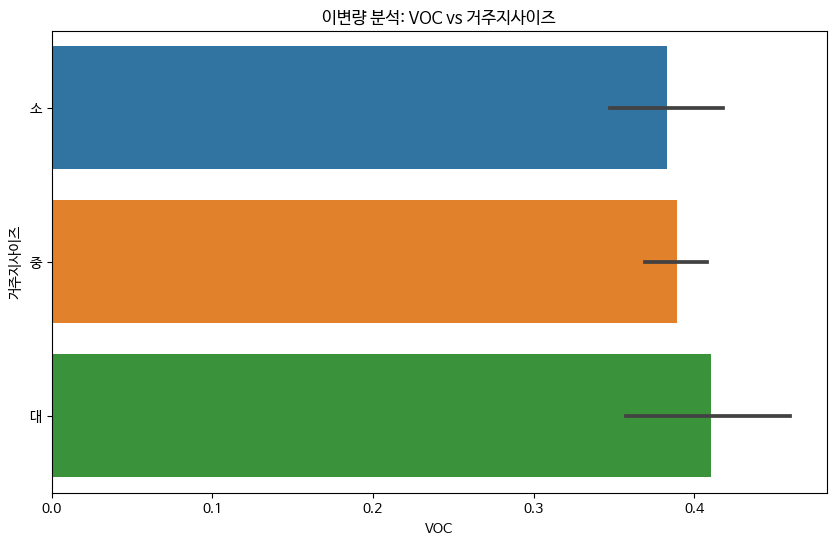

Chi-square Test for Independence between VOC and 거주지사이즈:
Chi-squared statistic = 20.001796724840553
P-value = 0.02923569866010084
VOC와 거주지사이즈와의 상관관계는 유의하지 않습니다.


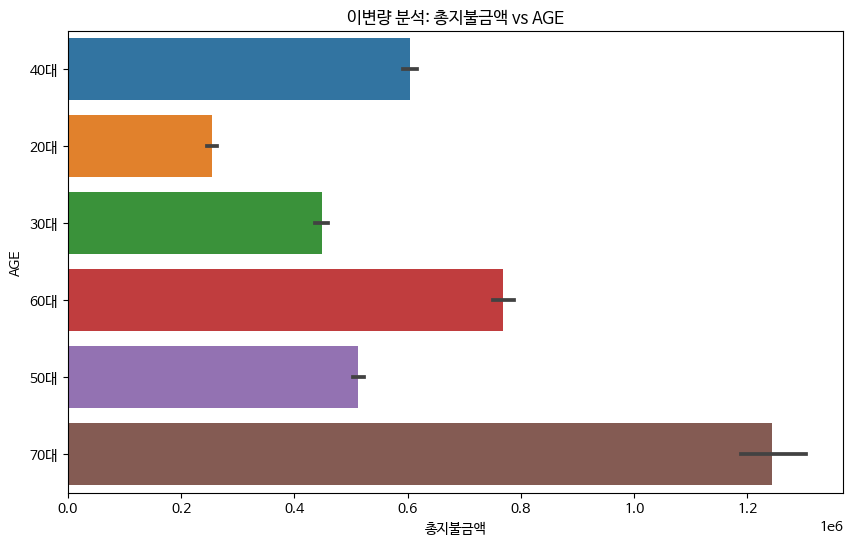

Chi-square Test for Independence between 총지불금액 and AGE:
Chi-squared statistic = 21172.66325327177
P-value = 0.0
총지불금액와 AGE와의 상관관계는 유의합니다.


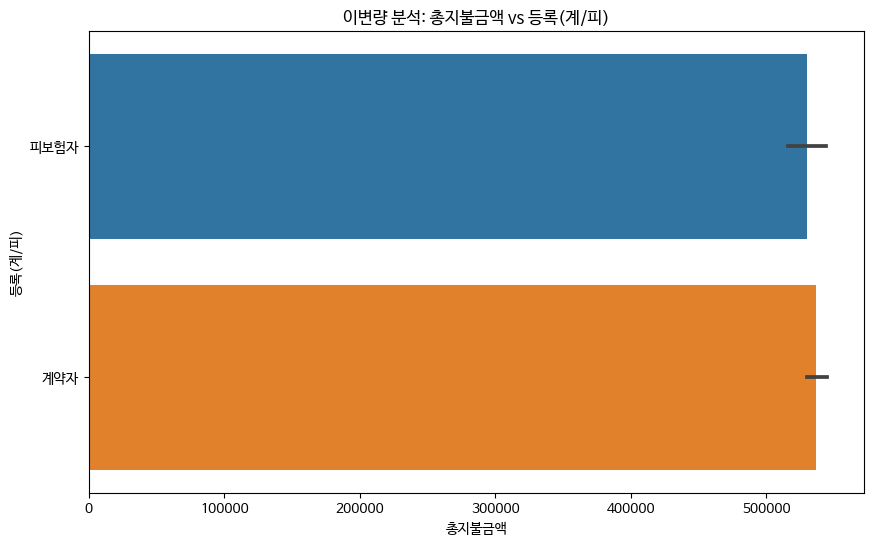

T-test 총지불금액 and 등록(계/피)
T-statistic=-0.9146343034405942
P-value=0.36040202450038983
총지불금액와 등록(계/피)와의 상관관계는 유의하지 않습니다.


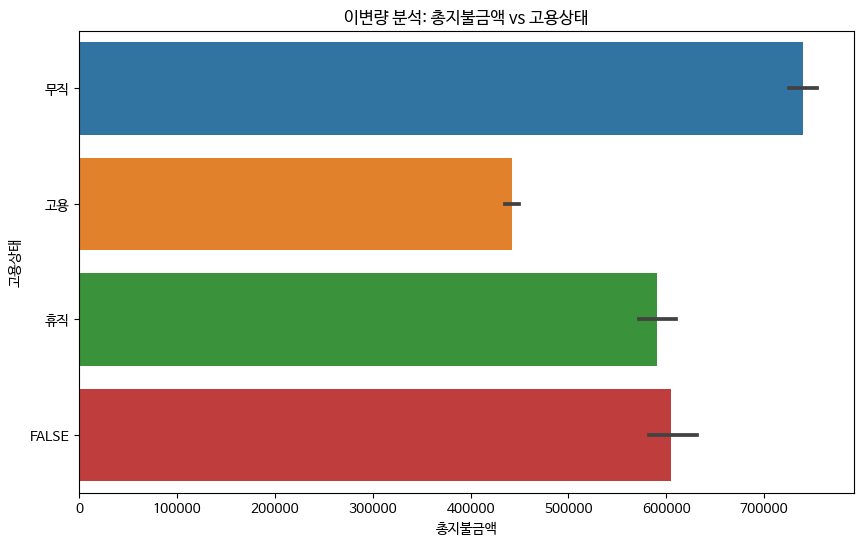

Chi-square Test for Independence between 총지불금액 and 고용상태:
Chi-squared statistic = 10269.511775439116
P-value = 0.0
총지불금액와 고용상태와의 상관관계는 유의합니다.


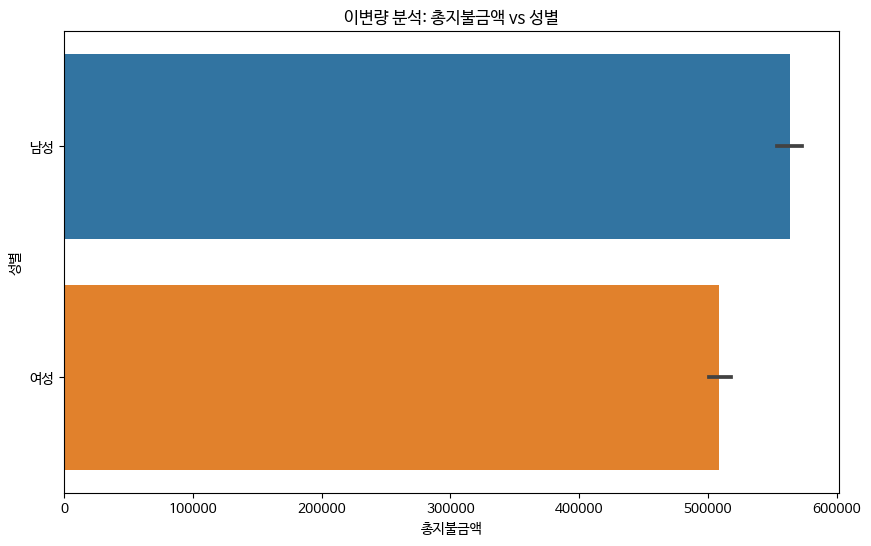

T-test 총지불금액 and 성별
T-statistic=8.371402275432583
P-value=6.322940781941533e-17
총지불금액와 성별와의 상관관계는 유의합니다.


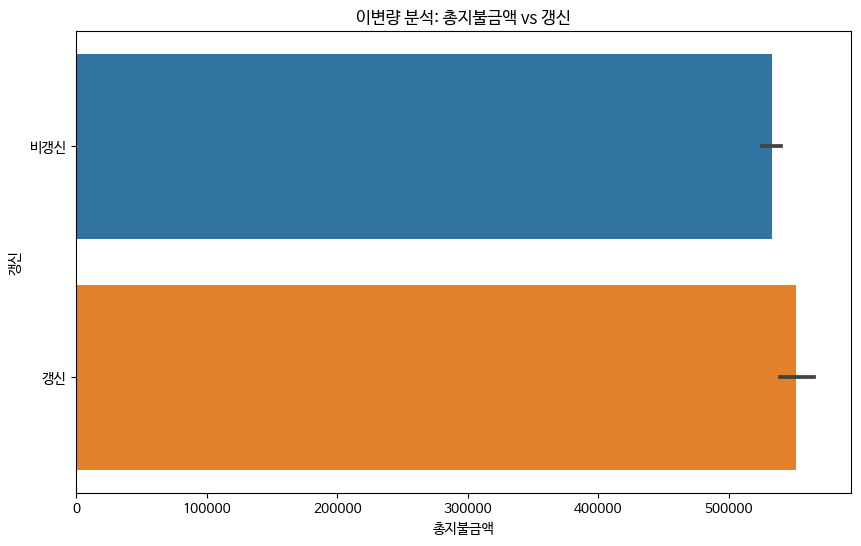

T-test 총지불금액 and 갱신
T-statistic=-2.0201404683450725
P-value=0.0433909984948697
총지불금액와 갱신와의 상관관계는 유의하지 않습니다.


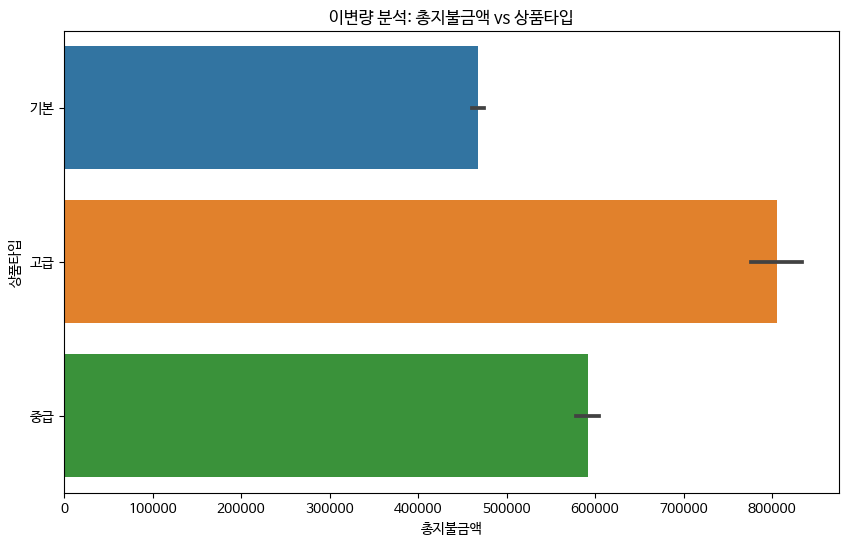

Chi-square Test for Independence between 총지불금액 and 상품타입:
Chi-squared statistic = 10705.518189649374
P-value = 0.0
총지불금액와 상품타입와의 상관관계는 유의합니다.


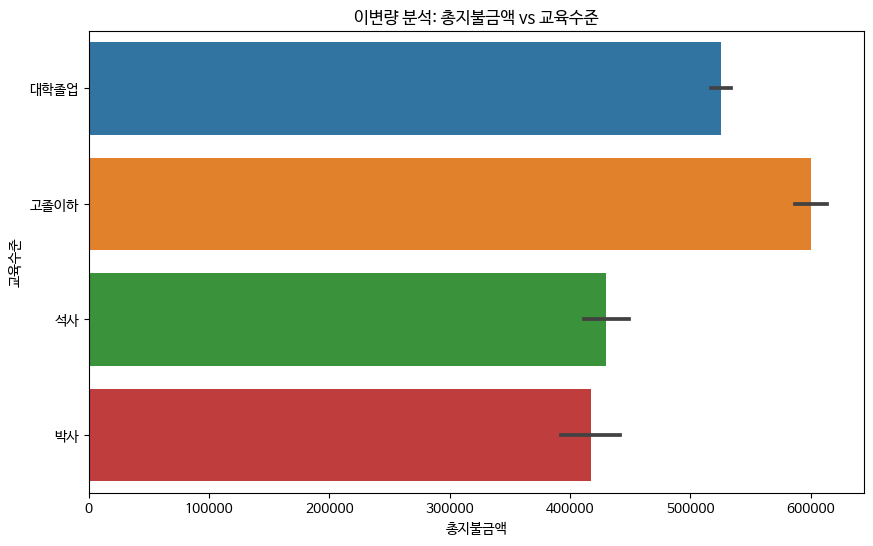

Chi-square Test for Independence between 총지불금액 and 교육수준:
Chi-squared statistic = 7649.78065657894
P-value = 2.3385611183185287e-219
총지불금액와 교육수준와의 상관관계는 유의합니다.


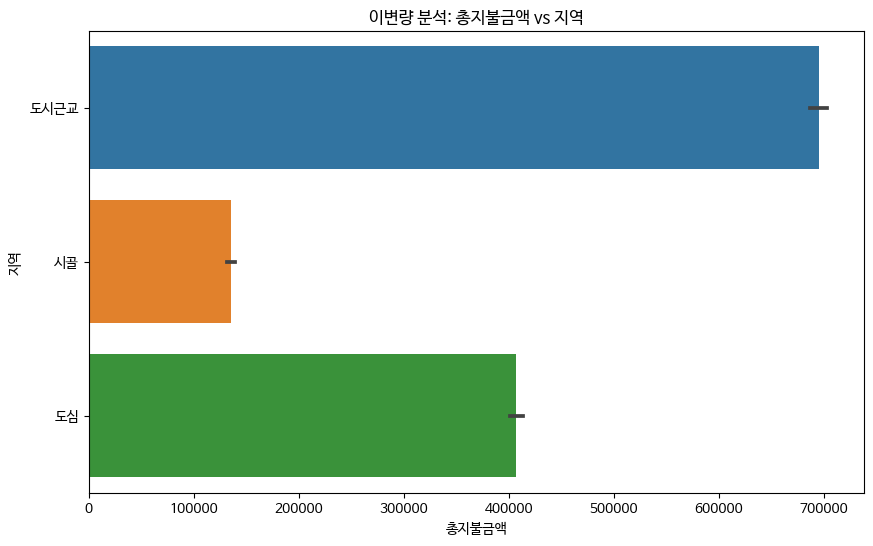

Chi-square Test for Independence between 총지불금액 and 지역:
Chi-squared statistic = 17851.765553832618
P-value = 0.0
총지불금액와 지역와의 상관관계는 유의합니다.


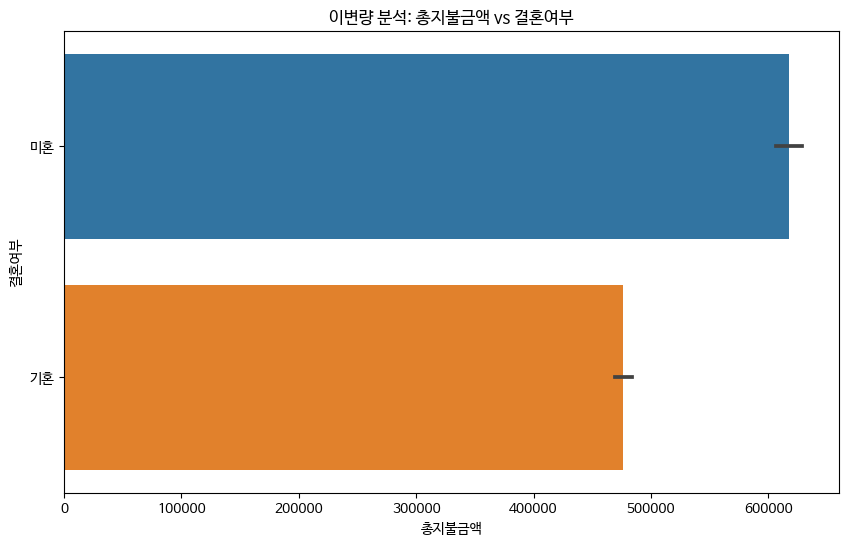

T-test 총지불금액 and 결혼여부
T-statistic=21.677899336674855
P-value=2.9975121178036904e-102
총지불금액와 결혼여부와의 상관관계는 유의합니다.


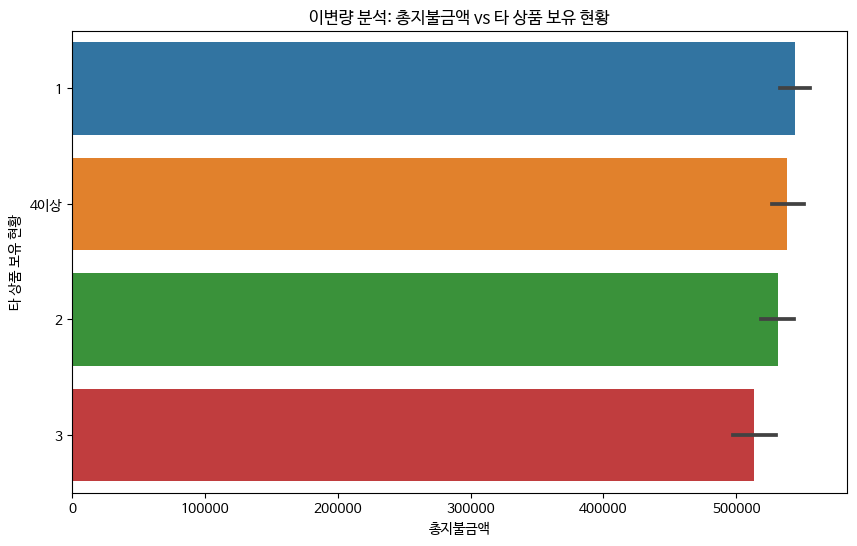

Chi-square Test for Independence between 총지불금액 and 타 상품 보유 현황:
Chi-squared statistic = 7047.250040815308
P-value = 2.4528321388825334e-161
총지불금액와 타 상품 보유 현황와의 상관관계는 유의합니다.


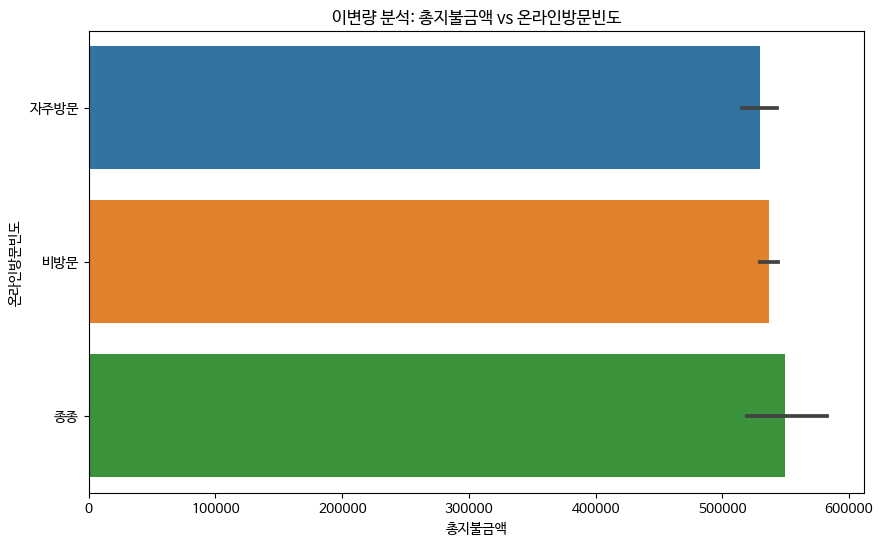

Chi-square Test for Independence between 총지불금액 and 온라인방문빈도:
Chi-squared statistic = 3766.2403098392724
P-value = 1.1113455202417835e-36
총지불금액와 온라인방문빈도와의 상관관계는 유의합니다.


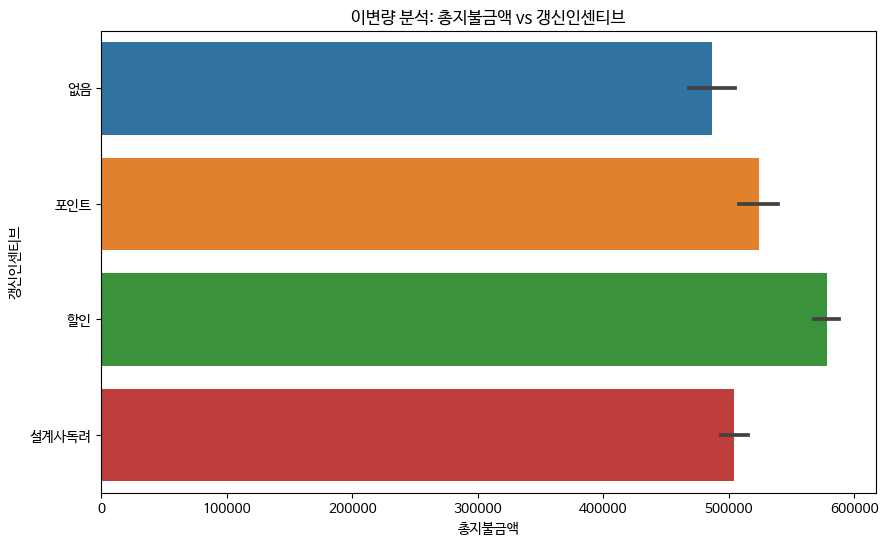

Chi-square Test for Independence between 총지불금액 and 갱신인센티브:
Chi-squared statistic = 7066.971852101624
P-value = 3.867588767633892e-163
총지불금액와 갱신인센티브와의 상관관계는 유의합니다.


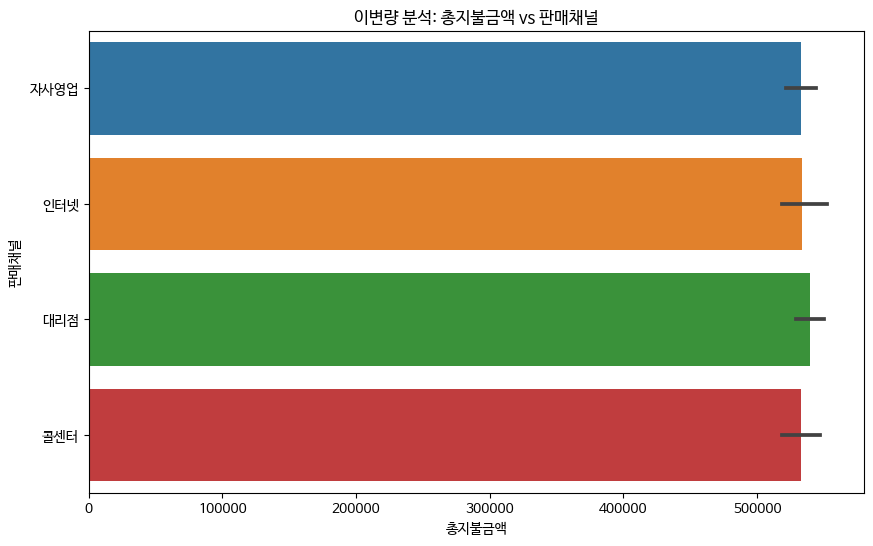

Chi-square Test for Independence between 총지불금액 and 판매채널:
Chi-squared statistic = 7066.103250381475
P-value = 4.644733606222759e-163
총지불금액와 판매채널와의 상관관계는 유의합니다.


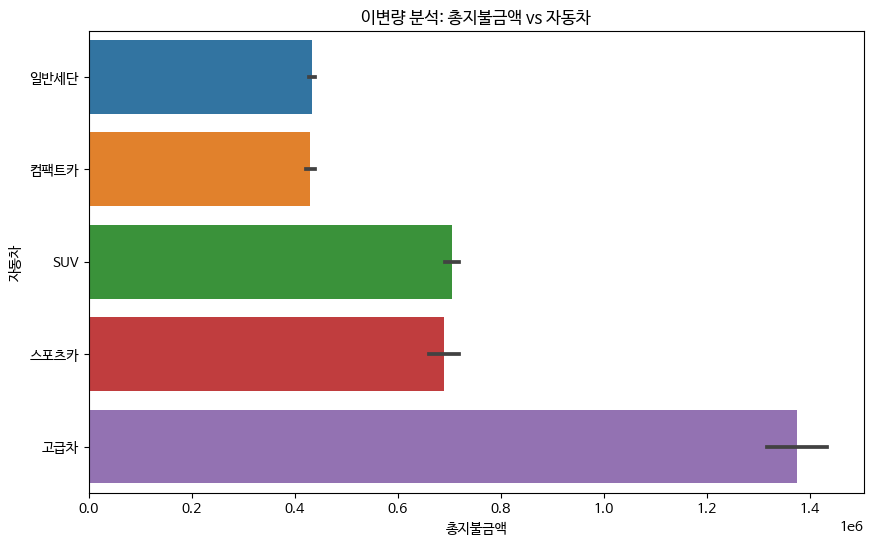

Chi-square Test for Independence between 총지불금액 and 자동차:
Chi-squared statistic = 19792.286834620518
P-value = 0.0
총지불금액와 자동차와의 상관관계는 유의합니다.


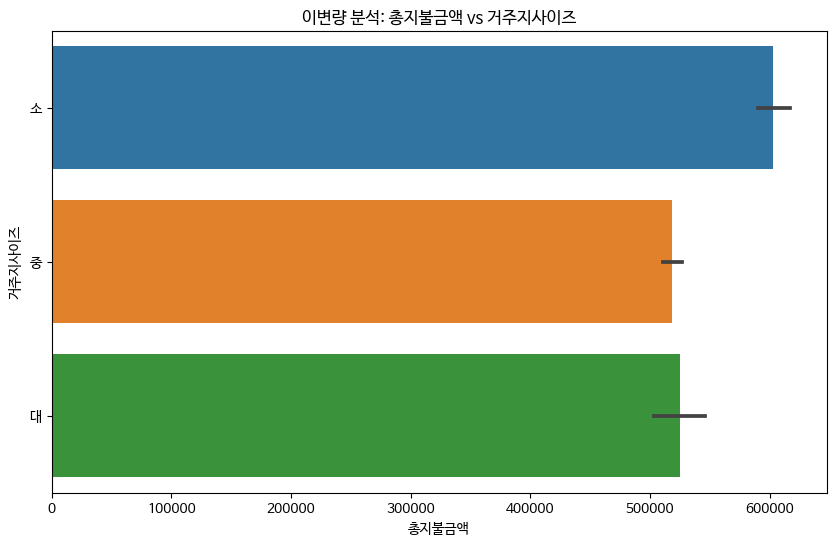

Chi-square Test for Independence between 총지불금액 and 거주지사이즈:
Chi-squared statistic = 5365.6674942719665
P-value = 1.0006963965946625e-174
총지불금액와 거주지사이즈와의 상관관계는 유의합니다.


In [ ]:
# 이변량 분석 (수치형 - 명목형)
for i in numeric_v:
  for j in object_v:
    bivariate_eda(data=data, x=i, y=j)

### 범주형 변수 상관관계
- 카이제곱 검정
- 독립변수: x 범주형
- 종속변수: y 연속형
- 모자이크 플롯, 트리 맵

### 연속형 - 범주형 상관관계 분석
- 로지스틱 회귀 분석

https://circle-square.tistory.com/88

In [ ]:
def anova_test(data, x, y):
  # 분산 분석
  groups = data.groupby(x)[y].apply(list)
  f_statistic, p_value = stats.f_oneway(*groups)
  # 결과 출력
  print(f'ANOVA Test for {x} and {y}:')
  print(f'F-statistic = {f_statistic}')
  print(f'P-value = {p_value}')

# 명목형 변수와 수치형 변수 간의 분산분석 (ANOVA) 예시
anova_test(data, '상품타입', '총지불금액')

ANOVA Test for 상품타입 and 총지불금액:
F-statistic = 519.6388463433374
P-value = 3.702170012016846e-217


                            OLS Regression Results                            
Dep. Variable:                  총지불금액   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     519.6
Date:                Mon, 25 Sep 2023   Prob (F-statistic):          3.70e-217
Time:                        17:29:27   Log-Likelihood:            -1.7001e+05
No. Observations:               12000   AIC:                         3.400e+05
Df Residuals:                   11997   BIC:                         3.401e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    8.05e+05   1.05e+04     76.678      0.0

<Figure size 800x600 with 0 Axes>

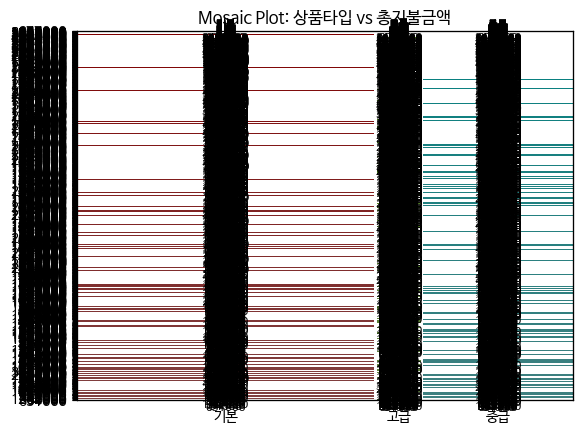

In [ ]:
https://blog.naver.com/breezehome50/222305541524